In [1]:
MERCHAINDISE = 'LTCUSDT'
DAYS = 100
START_DATE = '2021-9-7'
END_DATE = '2021-9-28'
    

In [2]:
# Private function

def report_by_hour(hour): 
    hour_observe = hour
    data_prices_str = f"data_prices_{hour_observe}"
    type_continuous_str = f"type_continuous_{hour_observe}"

    data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
    data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

    print(f"Giờ {hour_observe}")
    print("________________________________")
    print(data_prices_up['hour_return'].describe())
    print(data_prices_up['hour_return'].sum())


    print("+++")
    print(data_prices_down['hour_return'].describe())
    print(data_prices_down['hour_return'].sum())

    data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


    print('____________________________________________________________')

    data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]

    exec(f"{type_continuous_str} = data_prices_by_hour")

    data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

    type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

    labels = type_continuous_group.index.values
    sizes = type_continuous_group.values

    plt.figure()
    fig1, ax1 = plt.subplots(figsize=(12, 7))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.legend()
    plt.show()

    print(type_continuous_group)

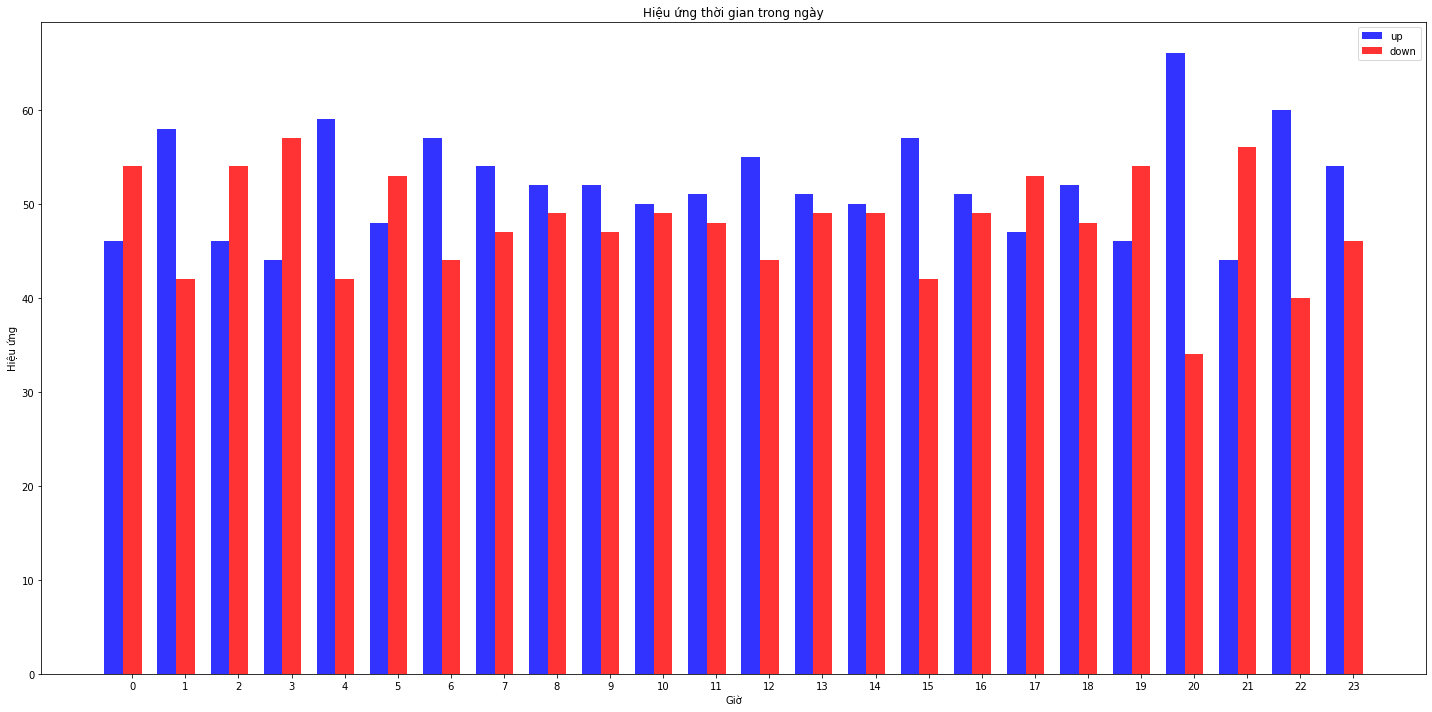

______________________________Hour return____________________________
________________________________
count    1250.000000
mean        0.750698
std         1.032406
min         0.000000
25%         0.222934
50%         0.514858
75%         0.988993
max        24.942529
Name: hour_return, dtype: float64
938.3730052404169
+++
count    1150.000000
mean       -0.779356
std         0.915502
min       -17.909761
25%        -0.998914
50%        -0.570037
75%        -0.272984
max        -0.010954
Name: hour_return, dtype: float64
-896.2590753868568
______________________________Loại tiếp diễn____________________________


<Figure size 720x720 with 0 Axes>

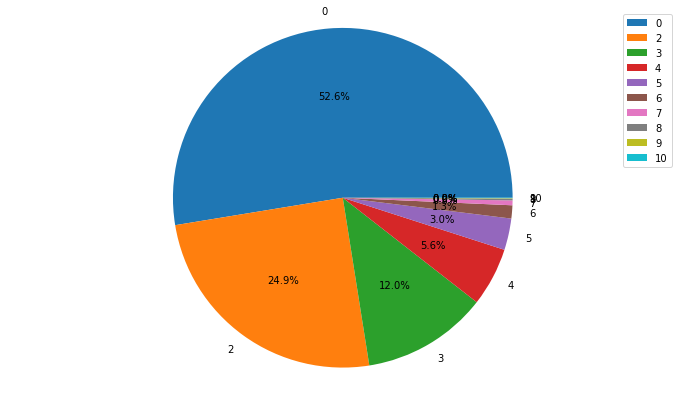

type_continuous
0     1262
2      598
3      287
4      134
5       72
6       30
7       11
8        4
9        1
10       1
dtype: int64
______________________________Thời gian biến động nhất____________________________


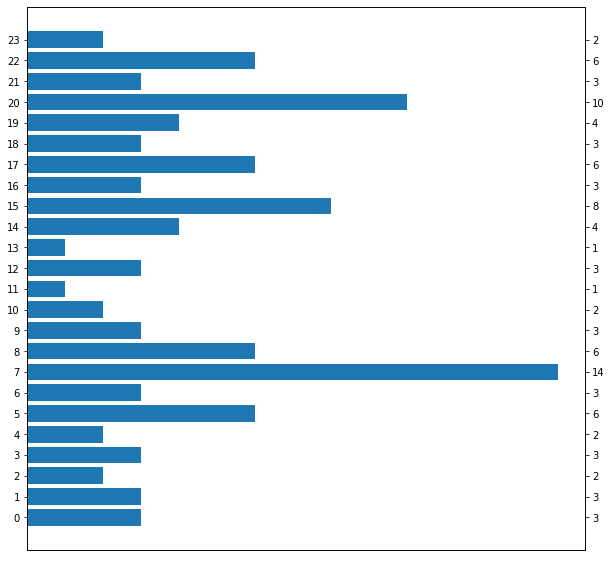

In [3]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous, until_now_type, candlestick_type_by_hour
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug(MERCHAINDISE)
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*DAYS, "DESC")
# candlestick = Candlestick(merchandise_rate_id, 'hour', 24*50, "DESC", start_date='2021-9-7', end_date='2021-9-28')

data_prices = candlestick.to_df()


# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['hour_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices['type'] = candlestick_type(data_prices)
data_prices['type_continuous'] = type_continuous(data_prices)

index = np.arange(24)
bar_width = 0.35
opacity = 0.8

x = ()
y = ()


for i in np.arange(24):
    data_prices_x = data_prices[data_prices['hour'] == i]

    number_up = len(data_prices_x[data_prices_x['type'] == 'up'])
    number_down = len(data_prices_x[data_prices_x['type'] == 'down'])

    x = x + (number_up,)
    y = y + (number_down,)


plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='up')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='r', label='down')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple(np.arange(24)))
plt.legend()
plt.tight_layout()
plt.show()


data_prices_up = data_prices[data_prices['type'] == 'up']
data_prices_down = data_prices[data_prices['type'] == 'down']

print("______________________________Hour return____________________________")

print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())


print("______________________________Loại tiếp diễn____________________________")

type_continuous_group = data_prices.groupby(['type_continuous']).size()


labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)


print("______________________________Thời gian biến động nhất____________________________")


def highest_in_day(x):
    max = data_prices[data_prices.day == x.day].hour_return.max()
    return data_prices[(data_prices.day == x.day) & (data_prices.hour_return == max)].hour.iat[0]


data_prices['highest_in_day'] = data_prices[[
    'day']].apply(lambda x: highest_in_day(x), axis=1)

highest_in_day_group = data_prices.groupby(
    'day').mean().groupby('highest_in_day').count()


list_hours = [int(hour) for hour in highest_in_day_group.index.values.tolist()]
list_highest_in_day = highest_in_day_group['hour'].tolist()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_highest_in_day, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_highest_in_day)

plt.show()


Giờ 1
________________________________
count    58.000000
mean      0.550292
std       0.612491
min       0.000000
25%       0.162492
50%       0.314064
75%       0.706649
max       3.177756
Name: hour_return, dtype: float64
31.91694941948395
+++
count    42.000000
mean     -0.599799
std       0.523205
min      -2.123027
25%      -0.914182
50%      -0.457761
75%      -0.183570
max      -0.022563
Name: hour_return, dtype: float64
-25.19153883063885
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


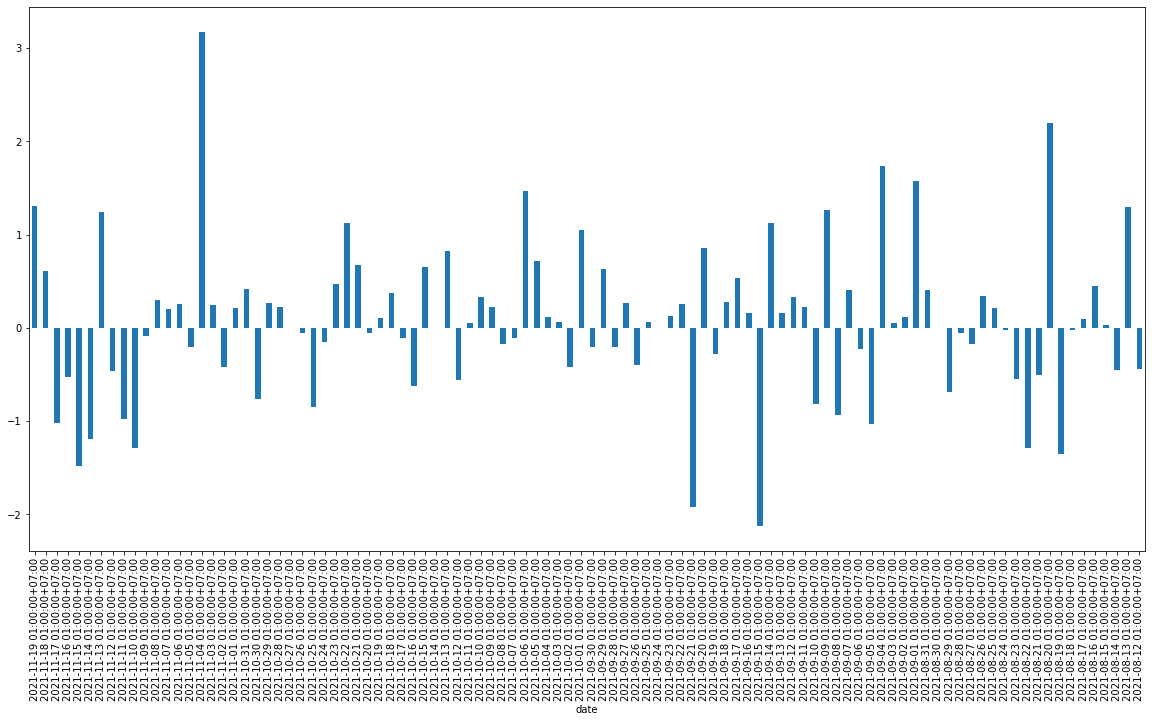

<Figure size 720x720 with 0 Axes>

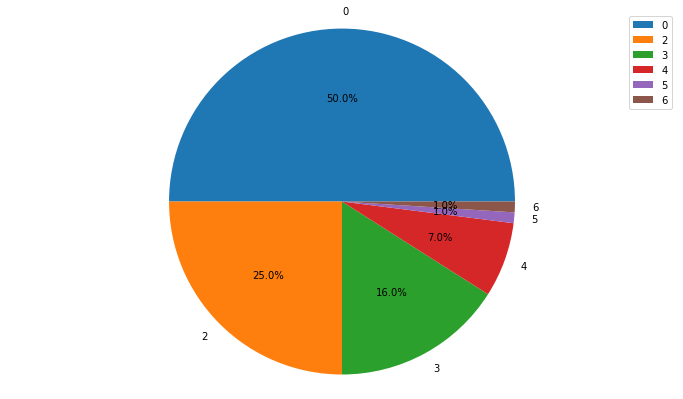

type_continuous_1
0    50
2    25
3    16
4     7
5     1
6     1
dtype: int64


In [4]:
hour_observe = 1
report_by_hour(hour_observe)


Giờ 2
________________________________
count    46.000000
mean      0.579161
std       0.490496
min       0.000000
25%       0.201034
50%       0.460400
75%       0.914156
max       2.225755
Name: hour_return, dtype: float64
26.6414196518114
+++
count    54.000000
mean     -0.642170
std       0.482019
min      -2.072357
25%      -0.885607
50%      -0.572685
75%      -0.292730
max      -0.052301
Name: hour_return, dtype: float64
-34.677174608259506
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


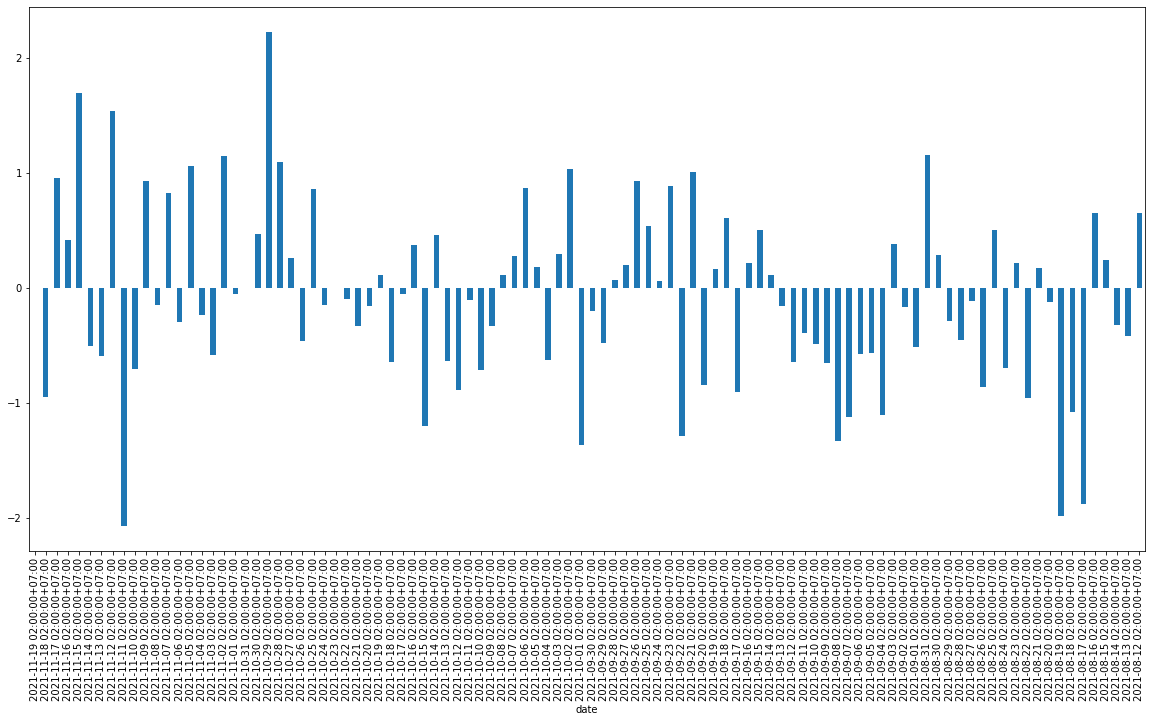

<Figure size 720x720 with 0 Axes>

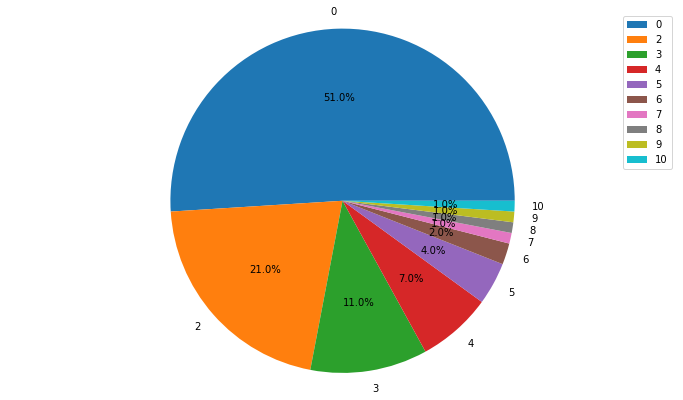

type_continuous_2
0     51
2     21
3     11
4      7
5      4
6      2
7      1
8      1
9      1
10     1
dtype: int64


In [5]:
hour_observe = 2
report_by_hour(hour_observe)

Giờ 3
________________________________
count    44.000000
mean      0.659304
std       0.545340
min       0.000000
25%       0.307379
50%       0.523104
75%       0.950114
max       2.870922
Name: hour_return, dtype: float64
29.00935721438692
+++
count    57.000000
mean     -0.869118
std       0.728564
min      -3.841991
25%      -1.221113
50%      -0.767868
75%      -0.299268
max      -0.044250
Name: hour_return, dtype: float64
-49.53971667562783
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


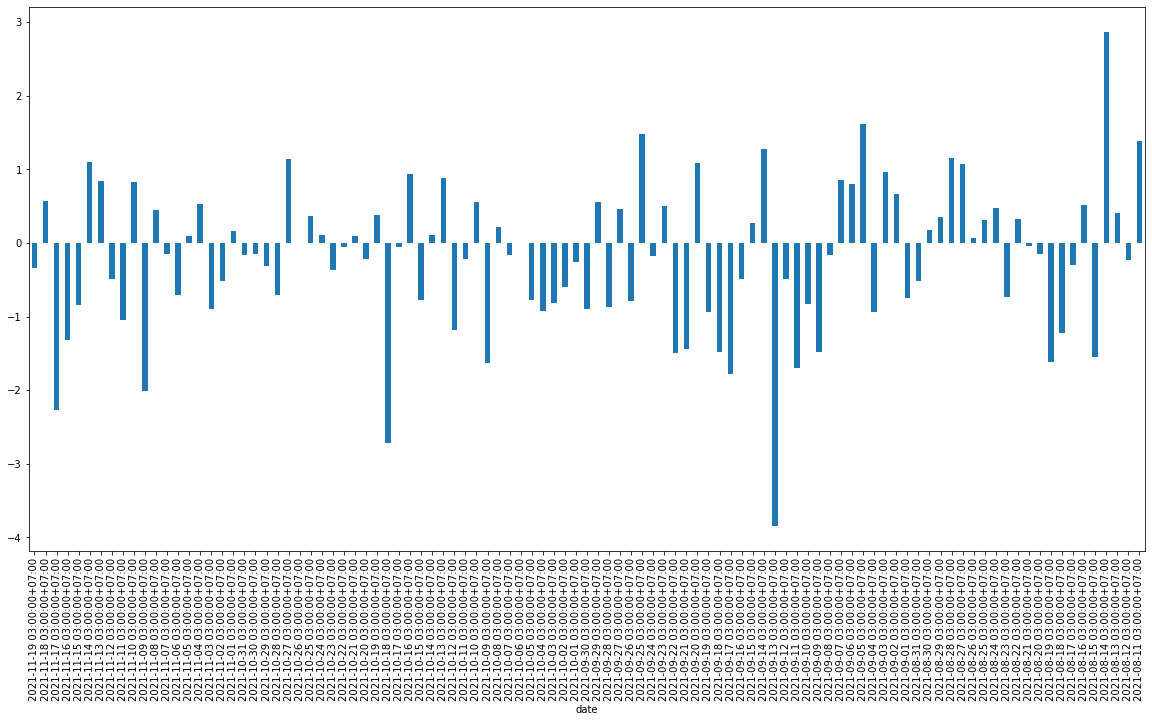

<Figure size 720x720 with 0 Axes>

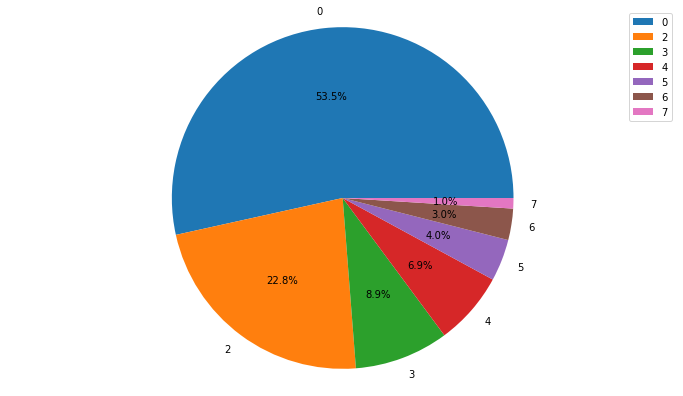

type_continuous_3
0    54
2    23
3     9
4     7
5     4
6     3
7     1
dtype: int64


In [6]:
hour_observe = 3
report_by_hour(hour_observe)

Giờ 4
________________________________
count    59.000000
mean      0.619447
std       0.617452
min       0.000000
25%       0.217666
50%       0.457143
75%       0.723236
max       3.802281
Name: hour_return, dtype: float64
36.54735003101017
+++
count    42.000000
mean     -0.756555
std       1.040514
min      -6.632838
25%      -0.855053
50%      -0.558272
75%      -0.222569
max      -0.049975
Name: hour_return, dtype: float64
-31.775317848756526
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


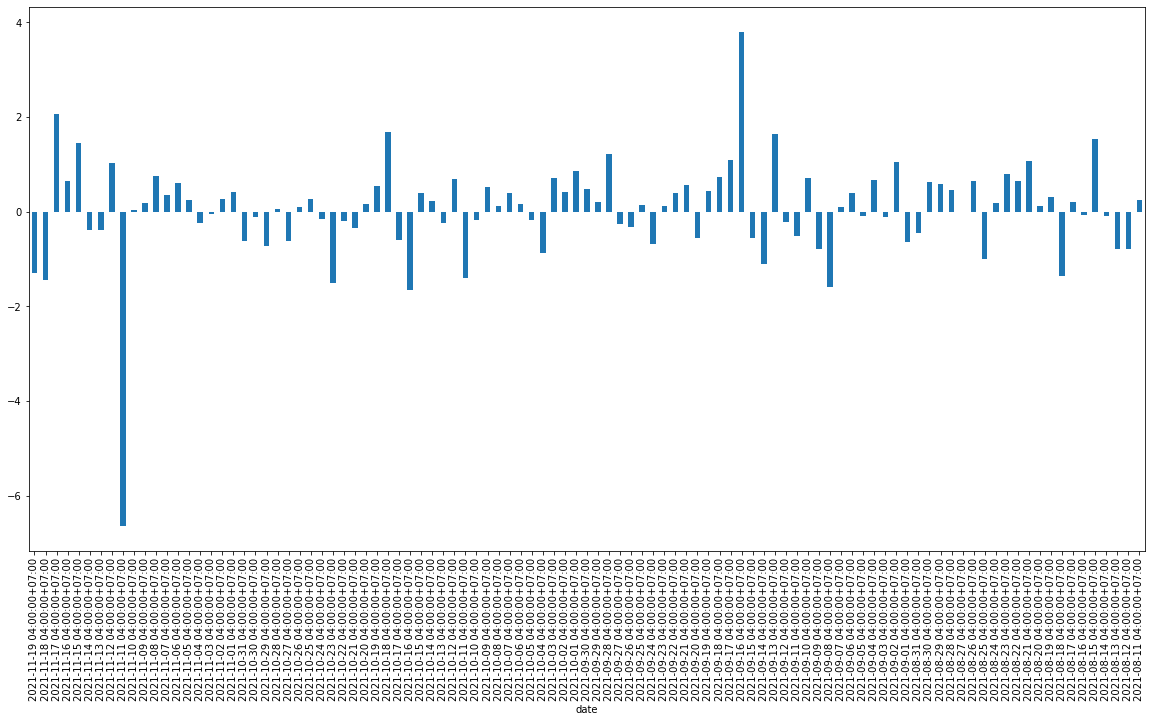

<Figure size 720x720 with 0 Axes>

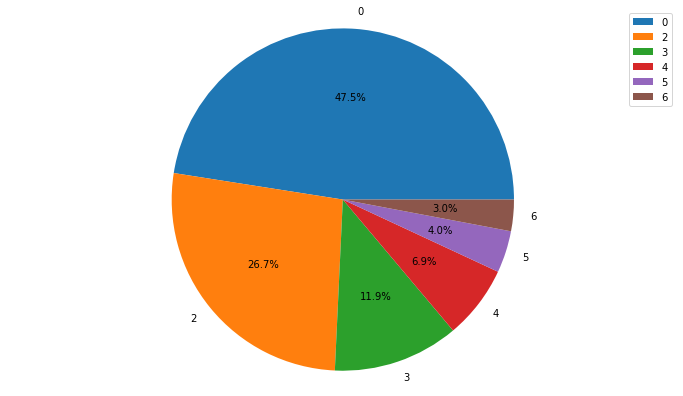

type_continuous_4
0    48
2    27
3    12
4     7
5     4
6     3
dtype: int64


In [7]:
hour_observe = 4
report_by_hour(hour_observe)

Giờ 5
________________________________
count    48.000000
mean      0.773559
std       0.537893
min       0.052659
25%       0.362408
50%       0.647917
75%       1.090338
max       2.178899
Name: hour_return, dtype: float64
37.130839134996286
+++
count    53.000000
mean     -0.731857
std       0.629679
min      -2.574257
25%      -0.988320
50%      -0.565682
75%      -0.265487
max      -0.011039
Name: hour_return, dtype: float64
-38.78842454354995
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


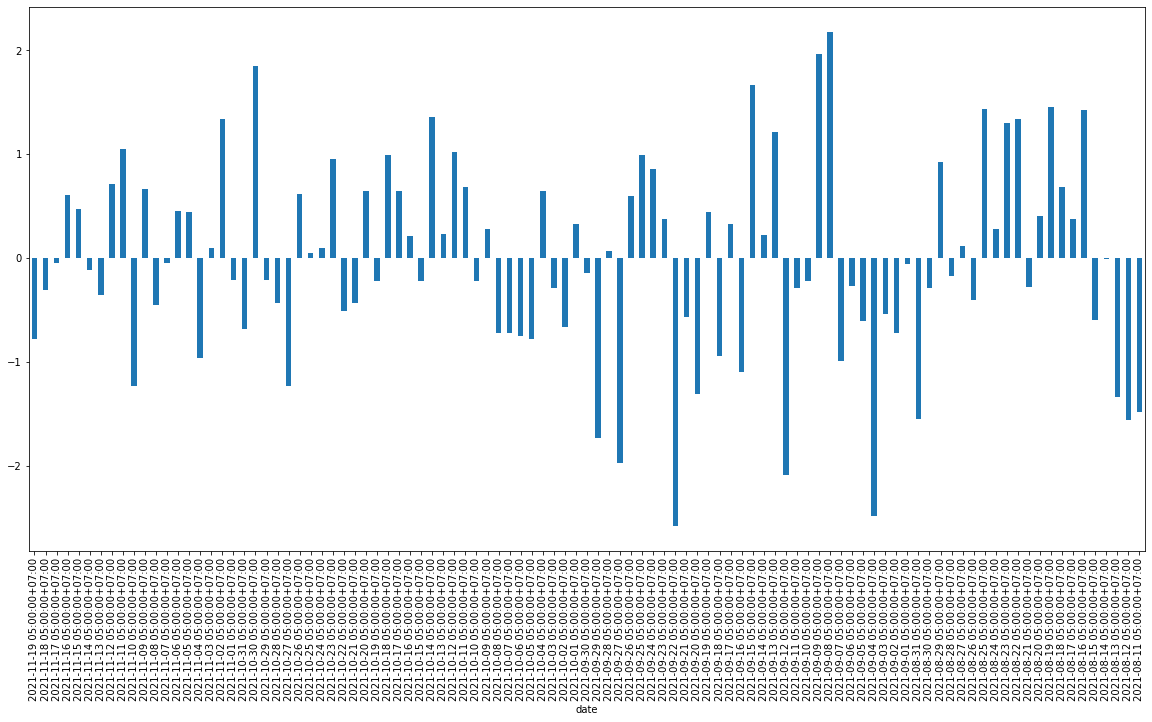

<Figure size 720x720 with 0 Axes>

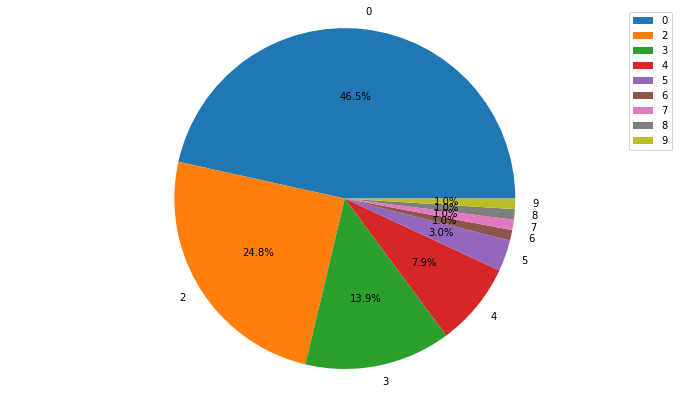

type_continuous_5
0    47
2    25
3    14
4     8
5     3
6     1
7     1
8     1
9     1
dtype: int64


In [8]:
hour_observe = 5
report_by_hour(hour_observe)

Giờ 6
________________________________
count    57.000000
mean      0.628985
std       0.659705
min       0.000000
25%       0.210526
50%       0.442696
75%       0.800854
max       2.971175
Name: hour_return, dtype: float64
35.852149134661396
+++
count    44.000000
mean     -0.873935
std       0.708815
min      -2.488231
25%      -1.349305
50%      -0.654867
75%      -0.340051
max      -0.016039
Name: hour_return, dtype: float64
-38.45315912293159
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


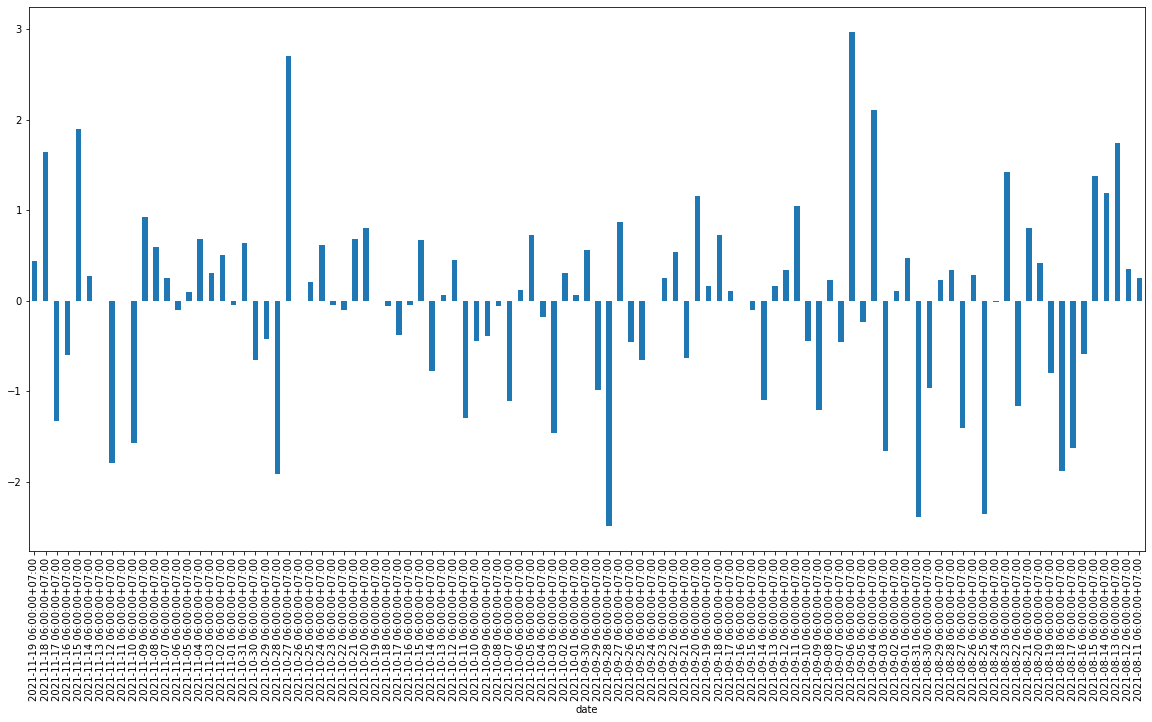

<Figure size 720x720 with 0 Axes>

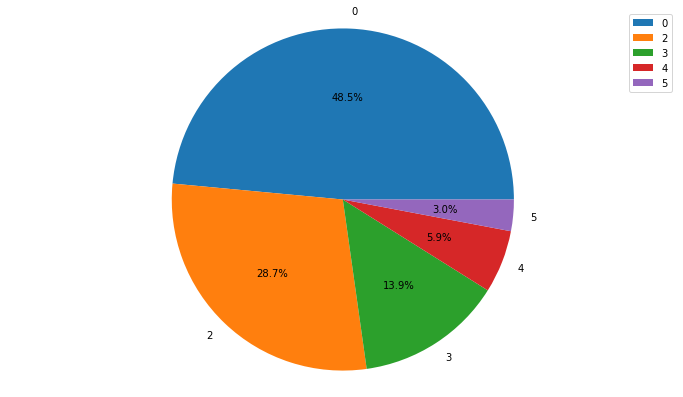

type_continuous_6
0    49
2    29
3    14
4     6
5     3
dtype: int64


In [9]:
hour_observe = 6
report_by_hour(hour_observe)

Giờ 7
________________________________
count    54.000000
mean      1.210100
std       0.725494
min       0.153453
25%       0.708518
50%       1.069228
75%       1.507856
max       3.711790
Name: hour_return, dtype: float64
65.34541305890315
+++
count    47.000000
mean     -0.974363
std       0.670441
min      -3.992395
25%      -1.231907
50%      -0.938416
75%      -0.466195
max      -0.054615
Name: hour_return, dtype: float64
-45.79504733012658
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


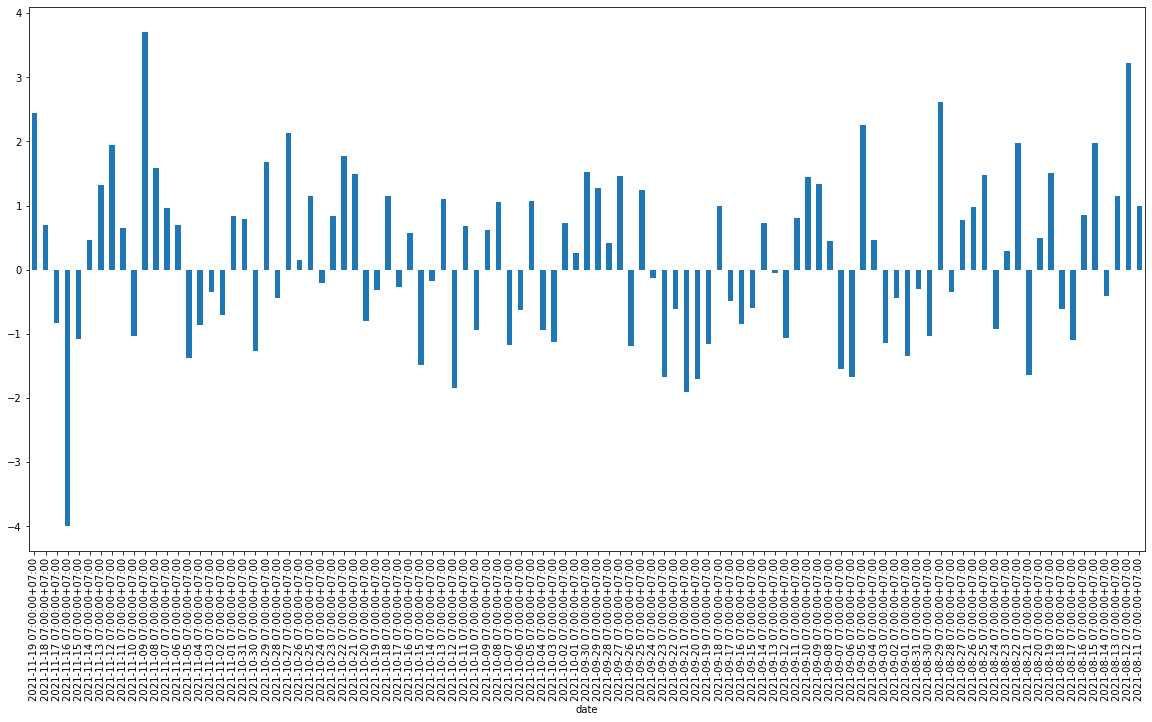

<Figure size 720x720 with 0 Axes>

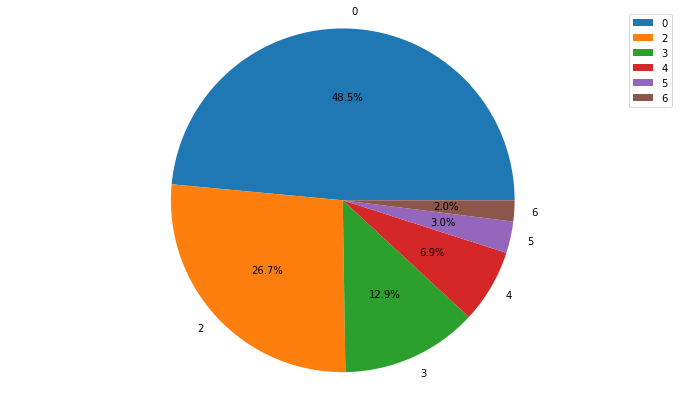

type_continuous_7
0    49
2    27
3    13
4     7
5     3
6     2
dtype: int64


In [10]:
hour_observe = 7
report_by_hour(hour_observe)

Giờ 8
________________________________
count    52.000000
mean      0.863450
std       0.872982
min       0.000000
25%       0.222376
50%       0.599440
75%       1.194586
max       4.085603
Name: hour_return, dtype: float64
44.89942347998175
+++
count    49.000000
mean     -0.692219
std       0.541108
min      -2.594340
25%      -0.941993
50%      -0.553250
75%      -0.330033
max      -0.010954
Name: hour_return, dtype: float64
-33.918713969550495
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


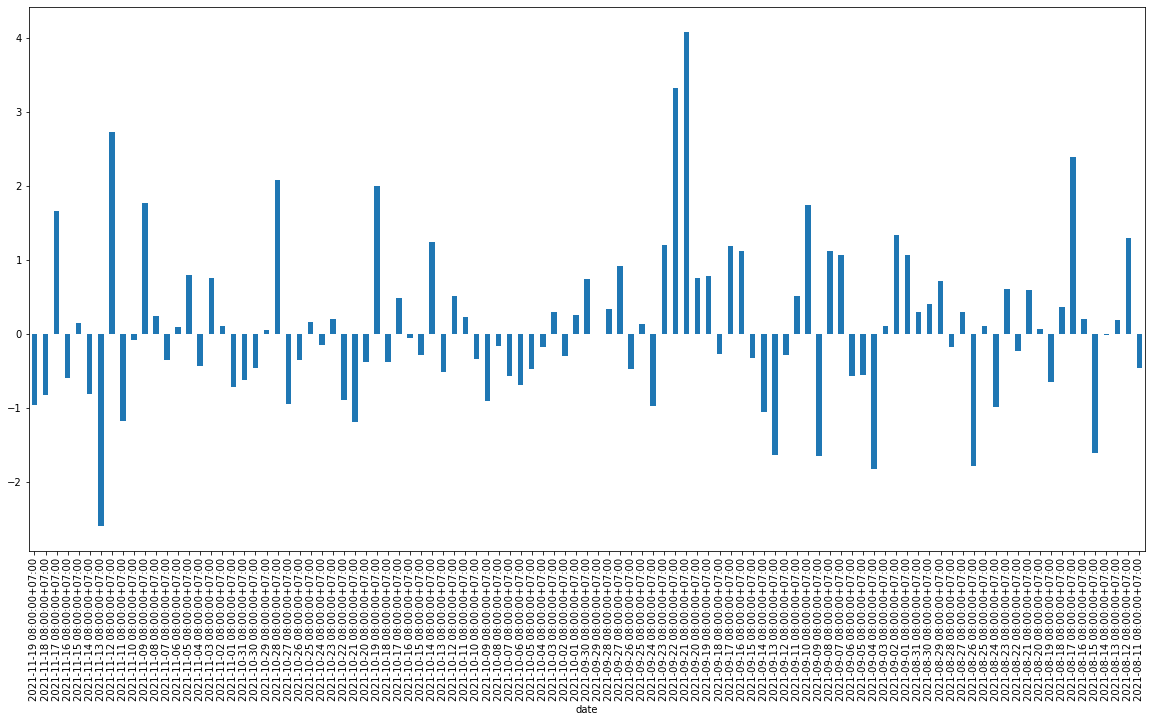

<Figure size 720x720 with 0 Axes>

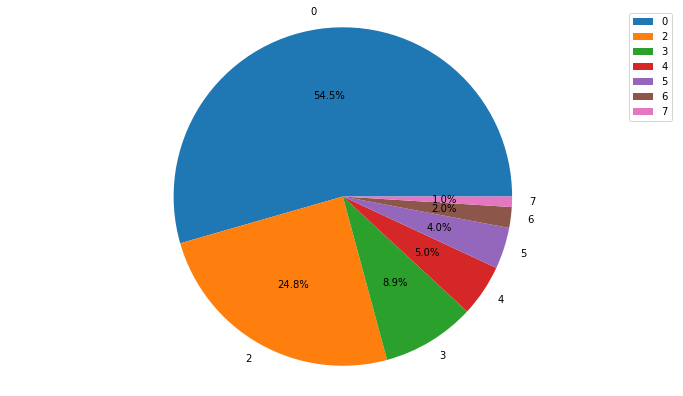

type_continuous_8
0    55
2    25
3     9
4     5
5     4
6     2
7     1
dtype: int64


In [11]:
hour_observe = 8
report_by_hour(hour_observe)

Giờ 9
________________________________
count    52.000000
mean      0.560731
std       0.572882
min       0.000000
25%       0.193913
50%       0.358884
75%       0.707549
max       3.088153
Name: hour_return, dtype: float64
29.15798983930361
+++
count    47.000000
mean     -0.700441
std       0.743802
min      -4.372842
25%      -1.010469
50%      -0.457924
75%      -0.213242
max      -0.055402
Name: hour_return, dtype: float64
-32.92071326598042
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


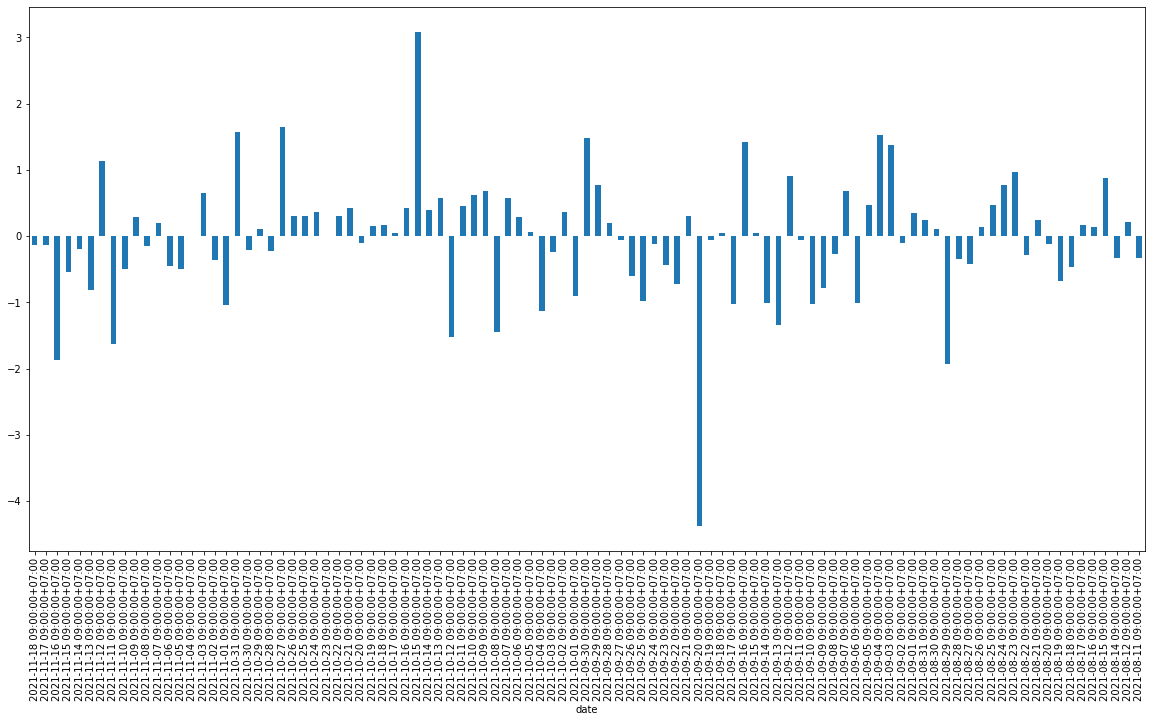

<Figure size 720x720 with 0 Axes>

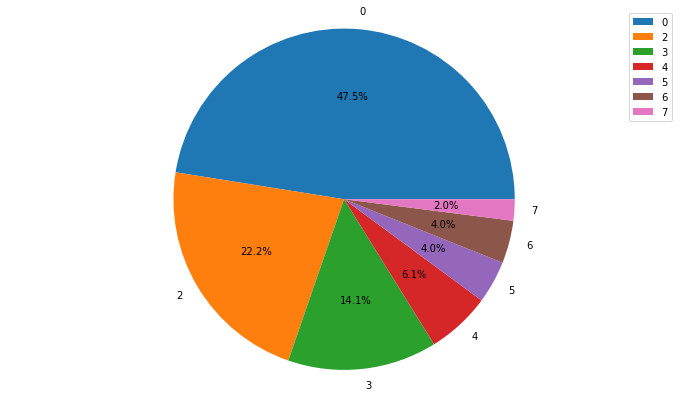

type_continuous_9
0    47
2    22
3    14
4     6
5     4
6     4
7     2
dtype: int64


In [12]:
hour_observe = 9
report_by_hour(hour_observe)

Giờ 10
________________________________
count    50.000000
mean      0.557822
std       0.475371
min       0.000000
25%       0.202361
50%       0.488661
75%       0.813422
max       2.020619
Name: hour_return, dtype: float64
27.89111040664902
+++
count    49.000000
mean     -0.838233
std       0.713059
min      -3.146853
25%      -1.014925
50%      -0.683491
75%      -0.310078
max      -0.027448
Name: hour_return, dtype: float64
-41.07341515586151
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


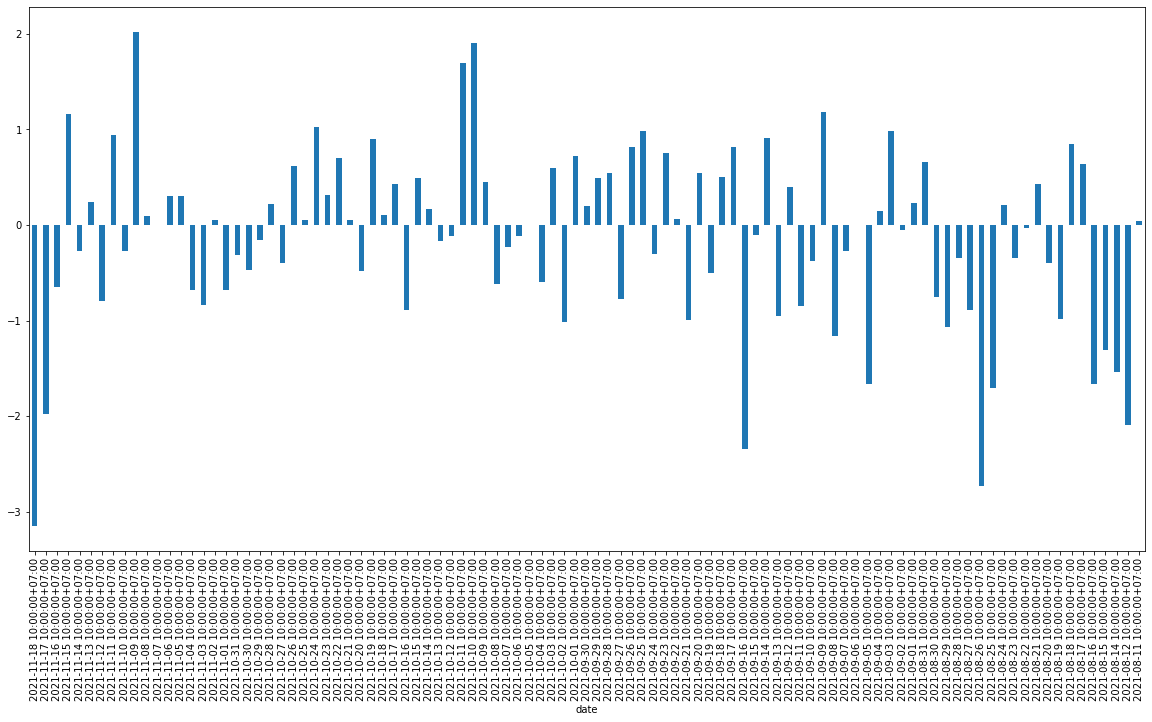

<Figure size 720x720 with 0 Axes>

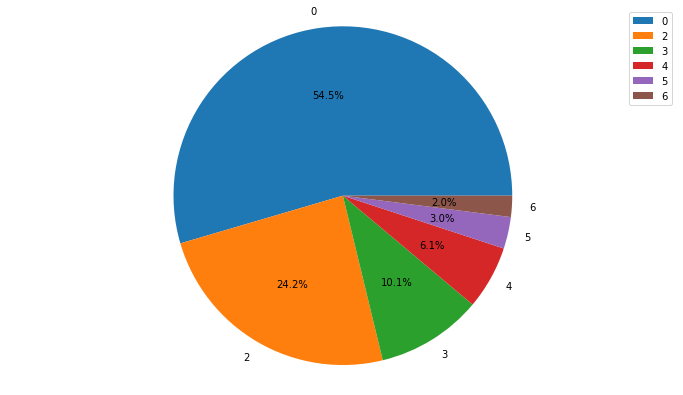

type_continuous_10
0    54
2    24
3    10
4     6
5     3
6     2
dtype: int64


In [13]:
hour_observe = 10
report_by_hour(hour_observe)

Giờ 11
________________________________
count    51.000000
mean      0.611919
std       0.729327
min       0.000000
25%       0.202018
50%       0.376749
75%       0.663235
max       3.614458
Name: hour_return, dtype: float64
31.207863474699316
+++
count    48.000000
mean     -0.443324
std       0.405542
min      -1.738076
25%      -0.555162
50%      -0.324349
75%      -0.147224
max      -0.017255
Name: hour_return, dtype: float64
-21.27955099119569
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


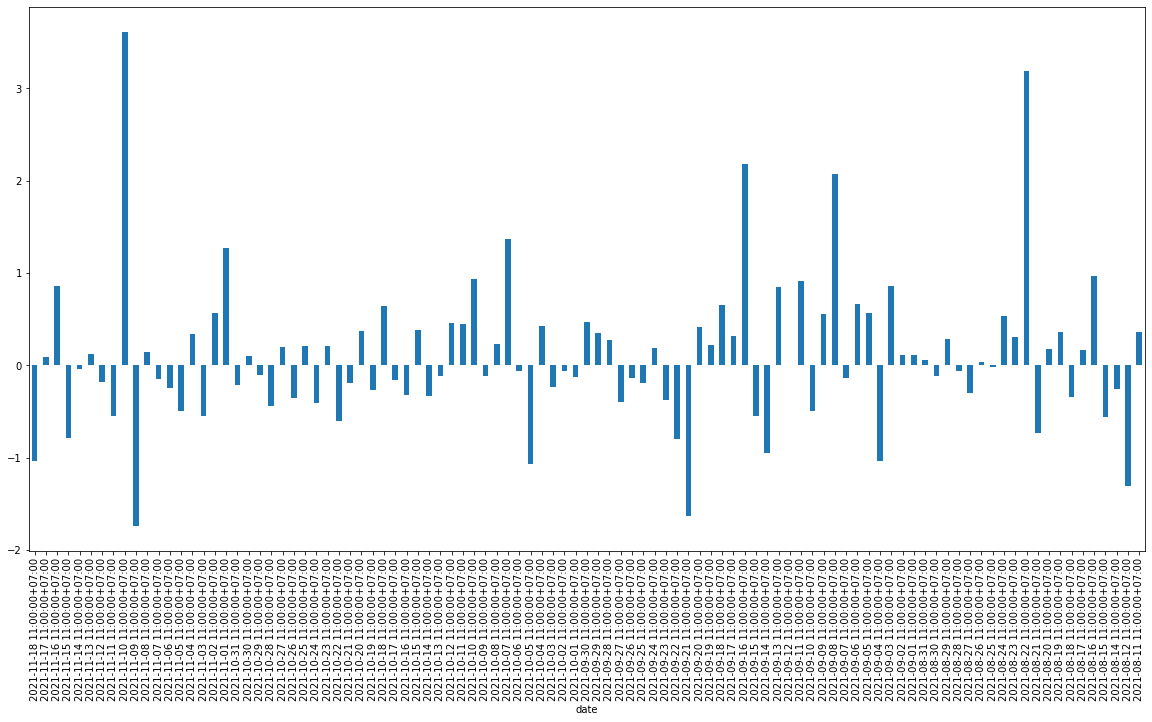

<Figure size 720x720 with 0 Axes>

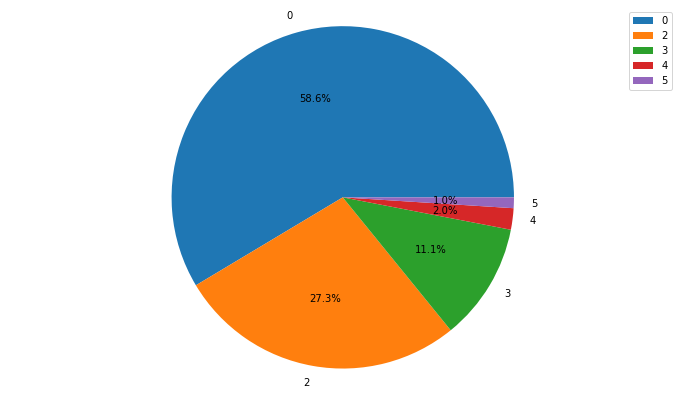

type_continuous_11
0    58
2    27
3    11
4     2
5     1
dtype: int64


In [14]:
hour_observe = 11
report_by_hour(hour_observe)

Giờ 12
________________________________
count    55.000000
mean      0.616995
std       0.537552
min       0.000000
25%       0.246013
50%       0.490463
75%       0.710477
max       2.324645
Name: hour_return, dtype: float64
33.93473046232042
+++
count    44.000000
mean     -0.570602
std       0.579390
min      -2.760207
25%      -0.753269
50%      -0.348856
75%      -0.165566
max      -0.037602
Name: hour_return, dtype: float64
-25.10648665818185
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


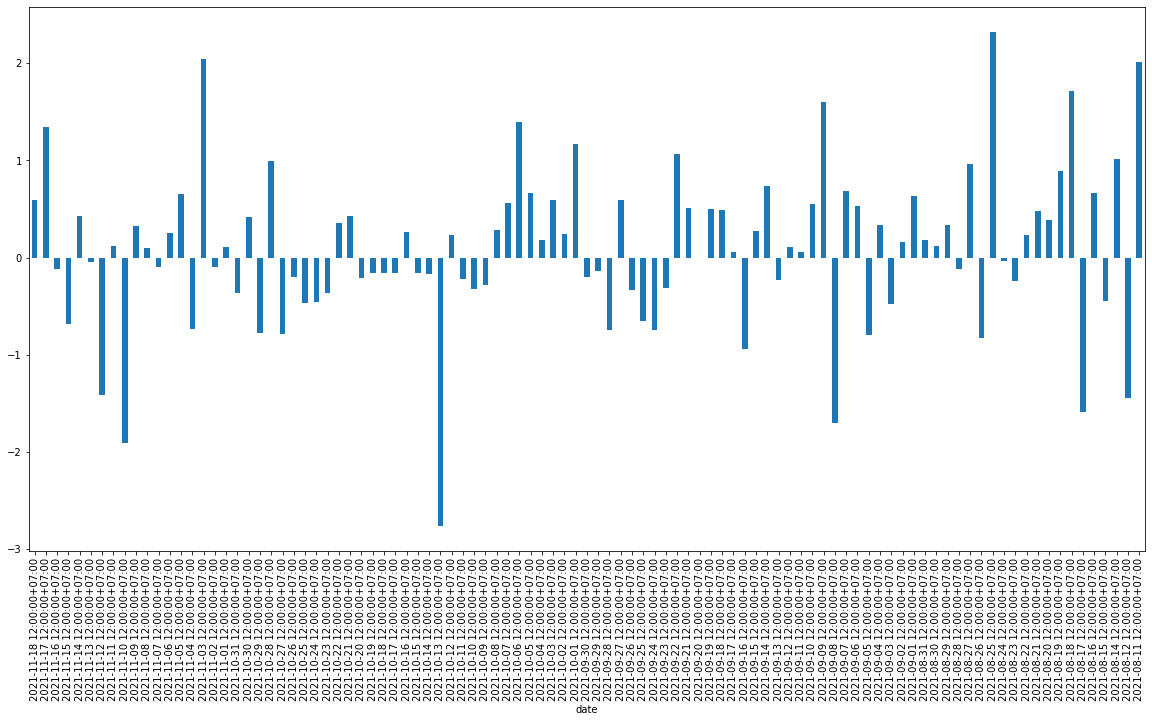

<Figure size 720x720 with 0 Axes>

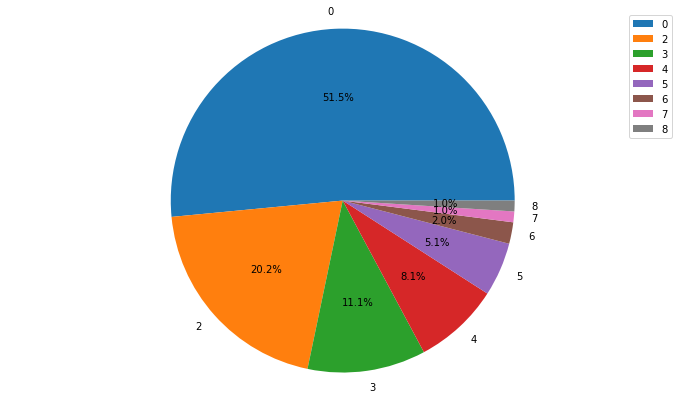

type_continuous_12
0    51
2    20
3    11
4     8
5     5
6     2
7     1
8     1
dtype: int64


In [15]:
hour_observe = 12
report_by_hour(hour_observe)

Giờ 13
________________________________
count    51.000000
mean      0.636808
std       0.753006
min       0.000000
25%       0.194041
50%       0.505618
75%       0.781917
max       4.138836
Name: hour_return, dtype: float64
32.4772239248517
+++
count    49.000000
mean     -0.588675
std       0.603361
min      -3.740927
25%      -0.631912
50%      -0.457782
75%      -0.260552
max      -0.039608
Name: hour_return, dtype: float64
-28.84506768019967
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


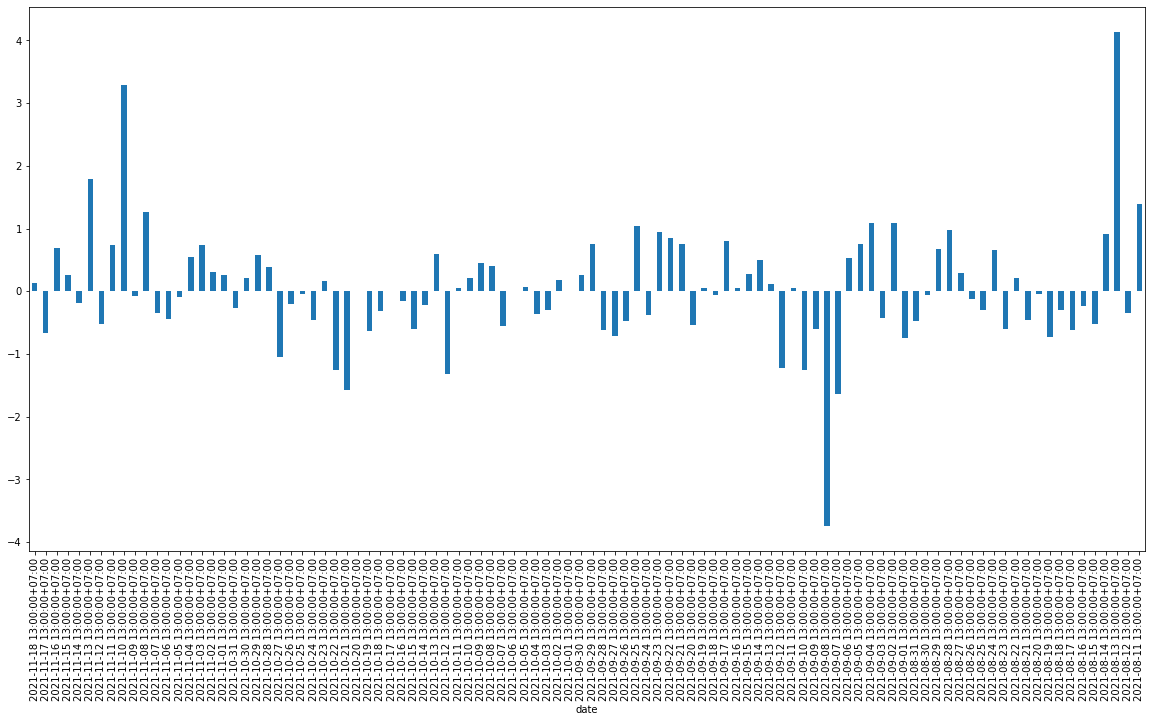

<Figure size 720x720 with 0 Axes>

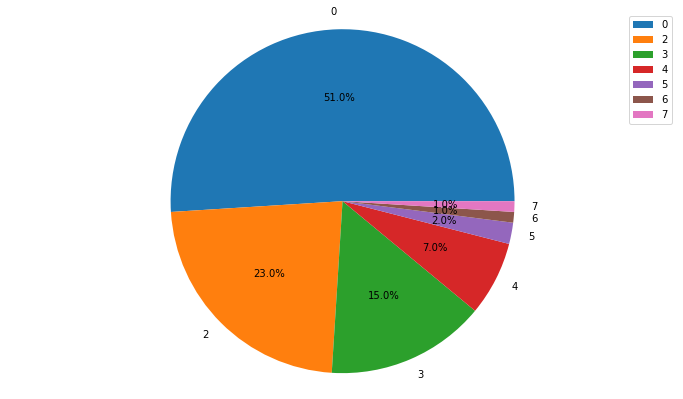

type_continuous_13
0    51
2    23
3    15
4     7
5     2
6     1
7     1
dtype: int64


In [16]:
hour_observe = 13
report_by_hour(hour_observe)

Giờ 14
________________________________
count    50.000000
mean      0.696947
std       0.777206
min       0.000000
25%       0.148522
50%       0.460265
75%       1.017743
max       3.869882
Name: hour_return, dtype: float64
34.84736189849257
+++
count    49.000000
mean     -0.808327
std       0.750945
min      -4.214752
25%      -1.100324
50%      -0.580475
75%      -0.325556
max      -0.040535
Name: hour_return, dtype: float64
-39.60803616629704
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


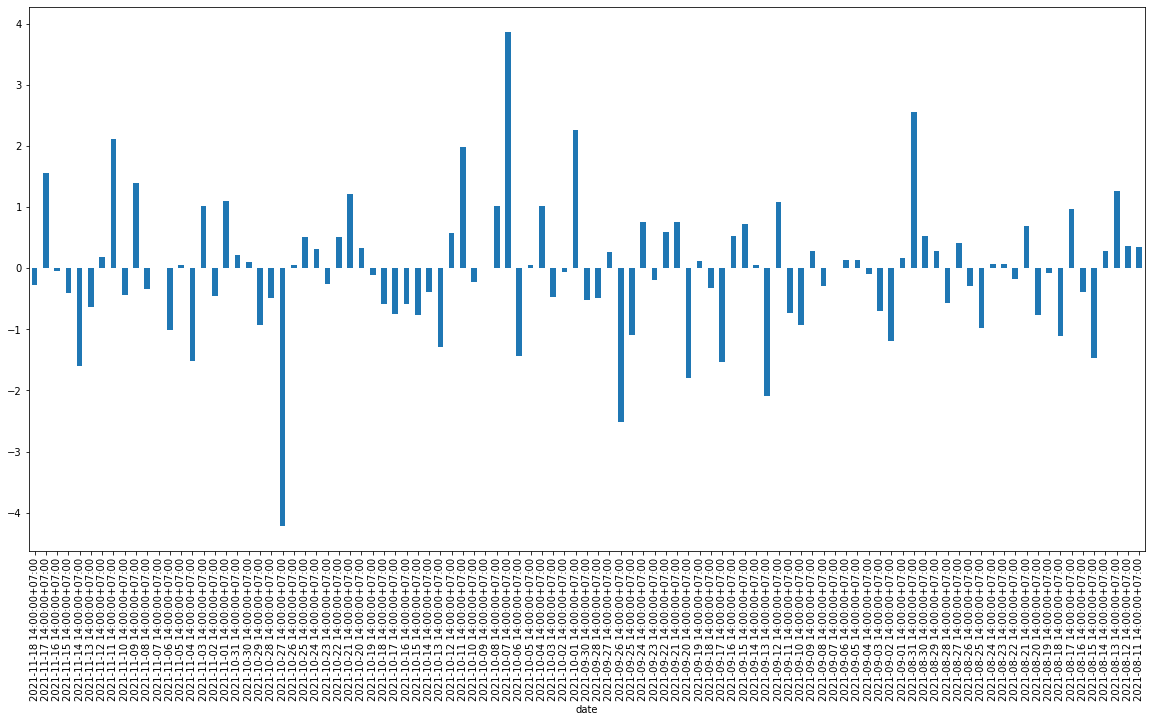

<Figure size 720x720 with 0 Axes>

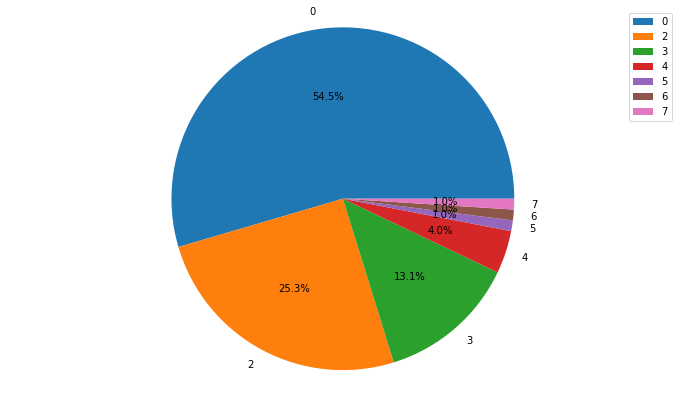

type_continuous_14
0    54
2    25
3    13
4     4
5     1
6     1
7     1
dtype: int64


In [17]:
hour_observe = 14
report_by_hour(hour_observe)

Giờ 15
________________________________
count    57.000000
mean      0.779174
std       0.944547
min       0.000000
25%       0.187032
50%       0.438116
75%       0.728784
max       4.447566
Name: hour_return, dtype: float64
44.412902487204605
+++
count    42.000000
mean     -0.752735
std       0.835697
min      -3.352541
25%      -0.785548
50%      -0.526622
75%      -0.276528
max      -0.050684
Name: hour_return, dtype: float64
-31.614889853055665
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


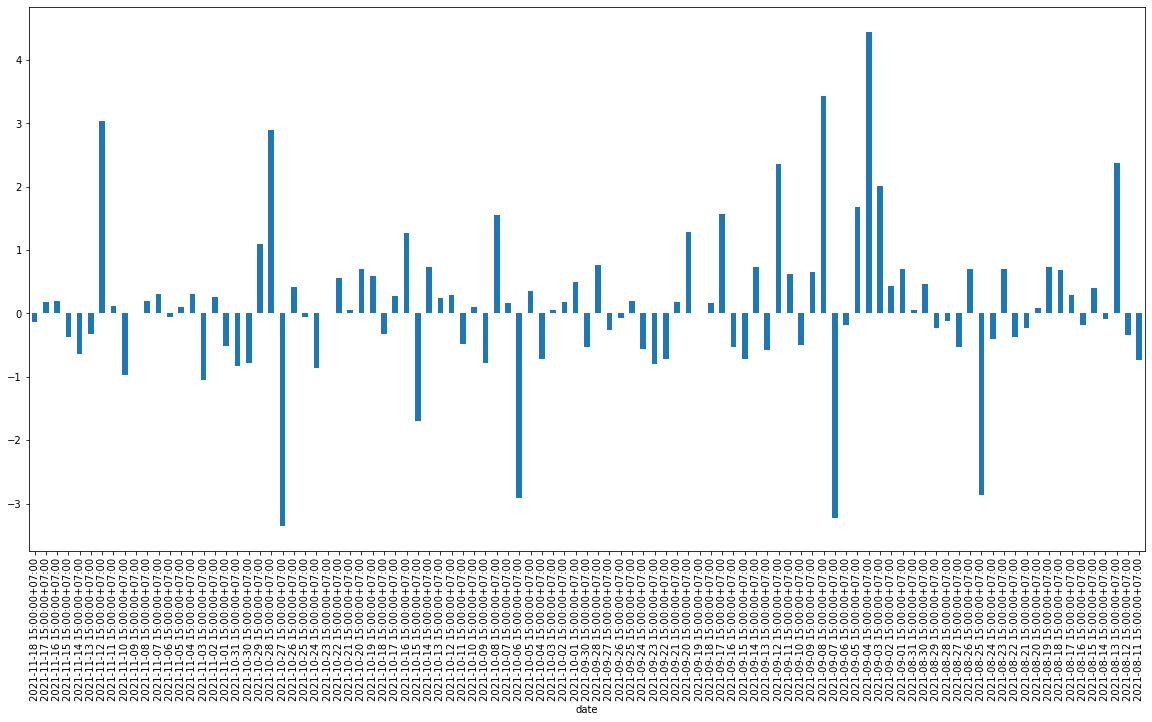

<Figure size 720x720 with 0 Axes>

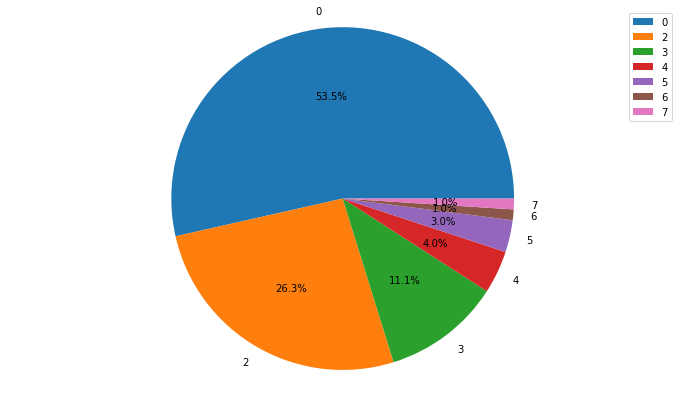

type_continuous_15
0    53
2    26
3    11
4     4
5     3
6     1
7     1
dtype: int64


In [18]:
hour_observe = 15
report_by_hour(hour_observe)

Giờ 16
________________________________
count    51.000000
mean      0.756136
std       0.892144
min       0.000000
25%       0.209224
50%       0.428096
75%       0.961438
max       4.881450
Name: hour_return, dtype: float64
38.56292728121807
+++
count    49.000000
mean     -1.003837
std       1.319997
min      -7.191995
25%      -1.145268
50%      -0.586510
75%      -0.278087
max      -0.059277
Name: hour_return, dtype: float64
-49.18802923327761
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


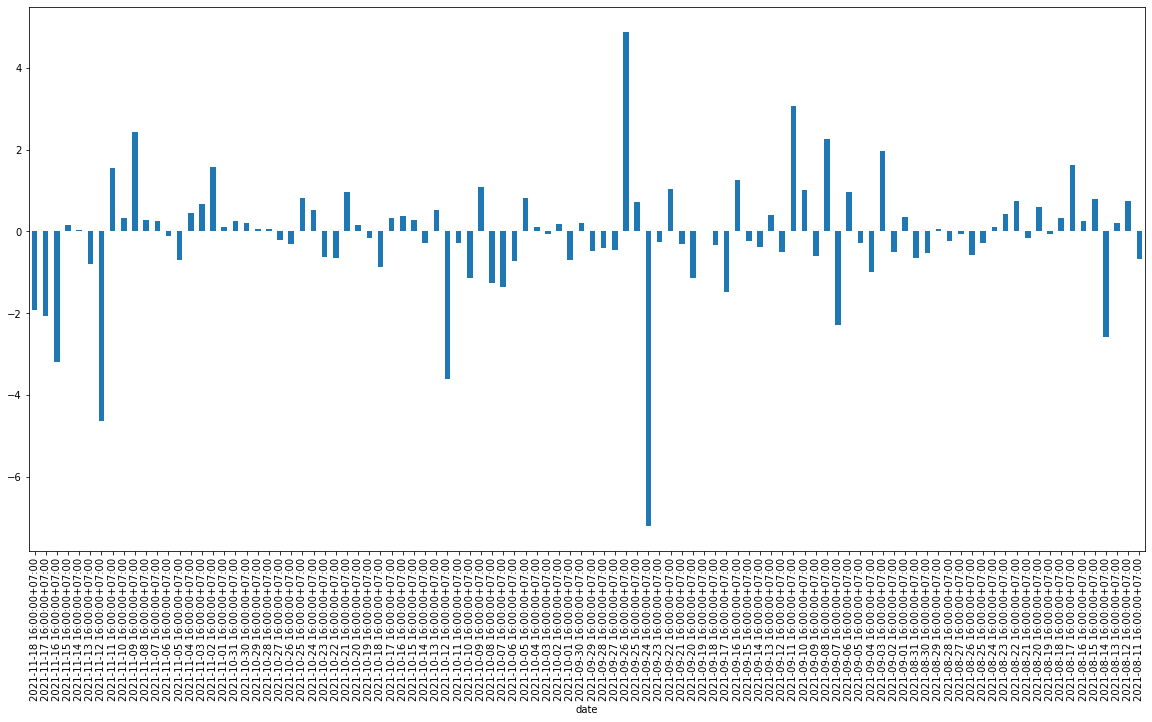

<Figure size 720x720 with 0 Axes>

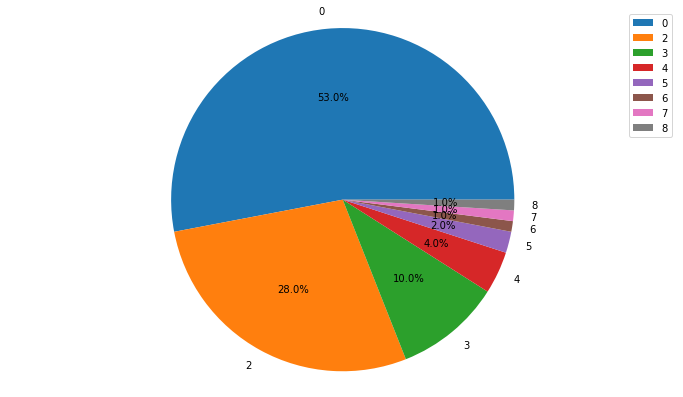

type_continuous_16
0    53
2    28
3    10
4     4
5     2
6     1
7     1
8     1
dtype: int64


In [19]:
hour_observe = 16
report_by_hour(hour_observe)

Giờ 17
________________________________
count    47.000000
mean      0.755194
std       0.915776
min       0.000000
25%       0.169557
50%       0.521394
75%       0.952318
max       4.263207
Name: hour_return, dtype: float64
35.49411000706719
+++
count    53.000000
mean     -0.681465
std       0.542925
min      -2.533937
25%      -0.916104
50%      -0.570342
75%      -0.273523
max      -0.053619
Name: hour_return, dtype: float64
-36.117633707709324
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


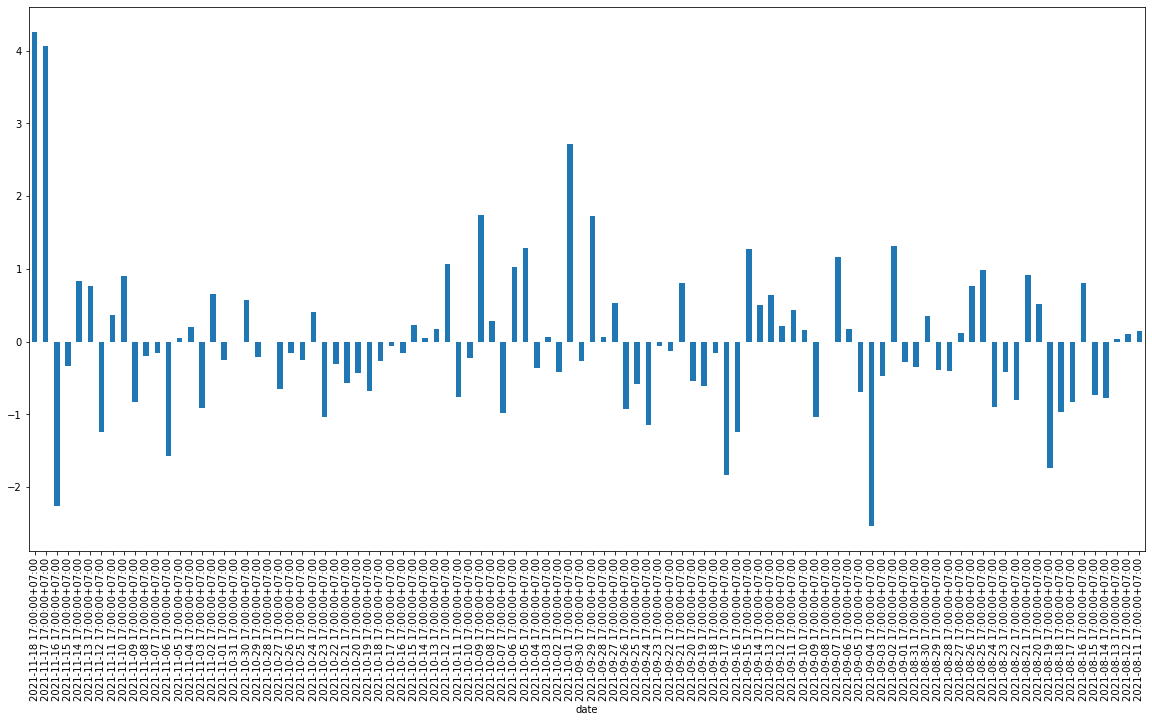

<Figure size 720x720 with 0 Axes>

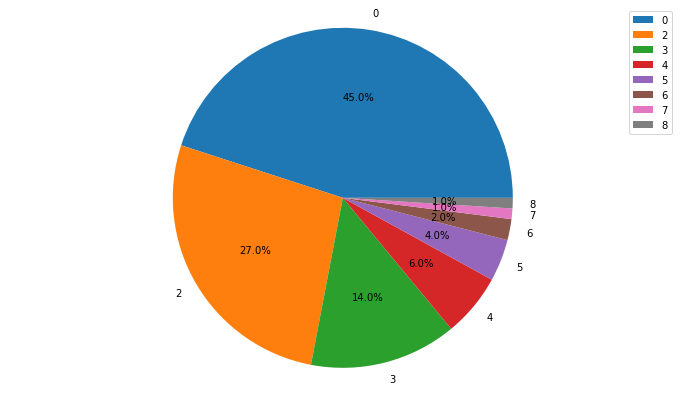

type_continuous_17
0    45
2    27
3    14
4     6
5     4
6     2
7     1
8     1
dtype: int64


In [20]:
hour_observe = 17
report_by_hour(hour_observe)

Giờ 18
________________________________
count    52.000000
mean      0.872388
std       1.033173
min       0.000000
25%       0.354983
50%       0.604572
75%       1.137969
max       6.790353
Name: hour_return, dtype: float64
45.36417694540266
+++
count    48.000000
mean     -0.980042
std       0.796833
min      -3.553922
25%      -1.291946
50%      -0.774818
75%      -0.440808
max      -0.106270
Name: hour_return, dtype: float64
-47.04202001024787
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


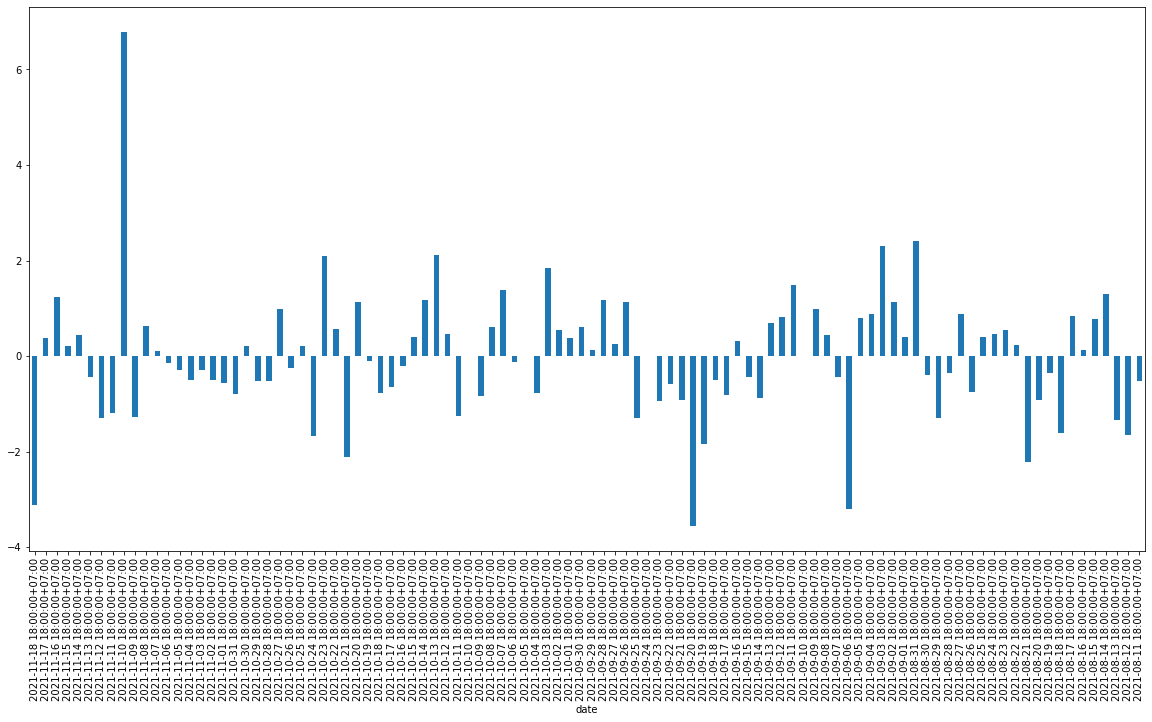

<Figure size 720x720 with 0 Axes>

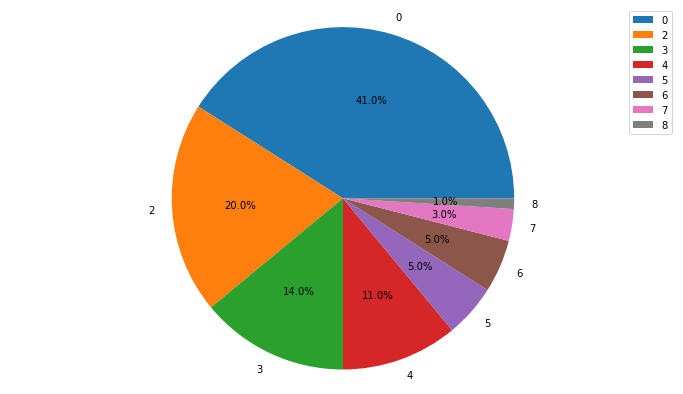

type_continuous_18
0    41
2    20
3    14
4    11
5     5
6     5
7     3
8     1
dtype: int64


In [21]:
hour_observe = 18
report_by_hour(hour_observe)

Giờ 19
________________________________
count    46.000000
mean      0.789587
std       1.006710
min       0.000000
25%       0.277637
50%       0.517857
75%       0.924474
max       6.302521
Name: hour_return, dtype: float64
36.32099696993242
+++
count    54.000000
mean     -0.690839
std       0.578317
min      -2.292683
25%      -0.985296
50%      -0.603686
75%      -0.262507
max      -0.049925
Name: hour_return, dtype: float64
-37.30531214418678
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


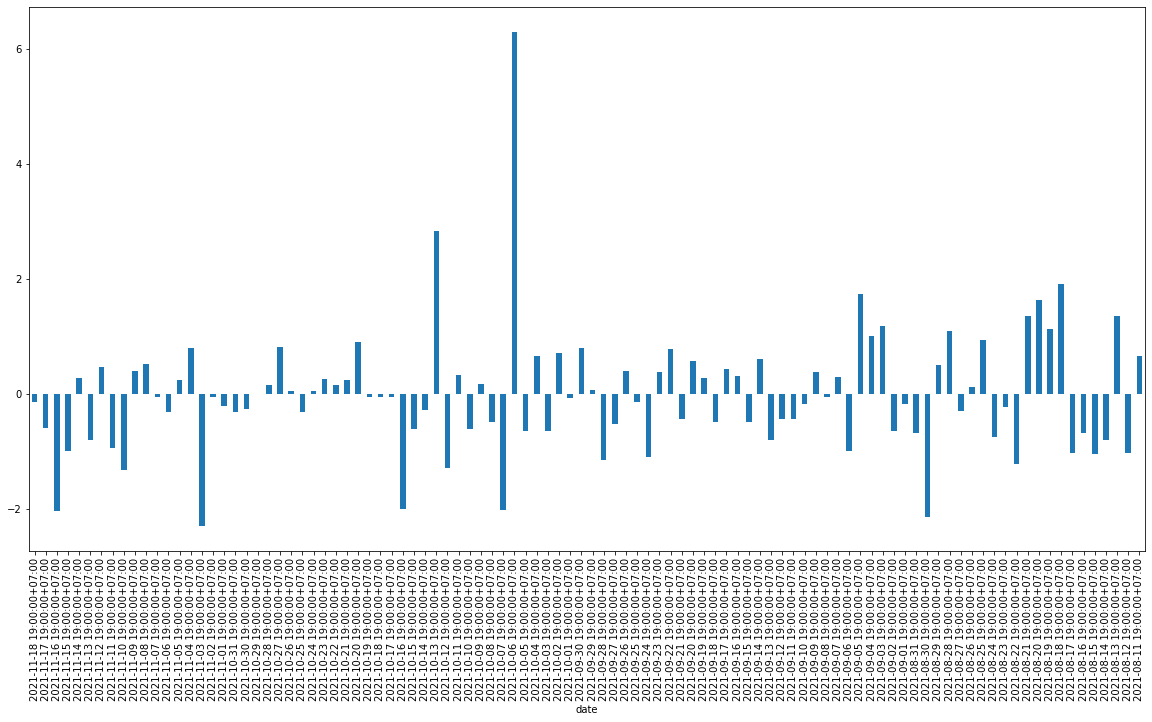

<Figure size 720x720 with 0 Axes>

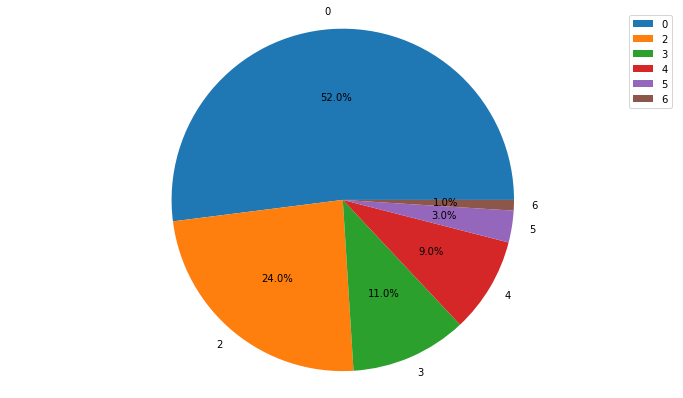

type_continuous_19
0    52
2    24
3    11
4     9
5     3
6     1
dtype: int64


In [22]:
hour_observe = 19
report_by_hour(hour_observe)

Giờ 20
________________________________
count    66.000000
mean      1.227706
std       3.050811
min       0.000000
25%       0.326293
50%       0.656126
75%       1.249027
max      24.942529
Name: hour_return, dtype: float64
81.02857788358773
+++
count    34.000000
mean     -0.789213
std       0.766294
min      -3.314607
25%      -0.904642
50%      -0.555420
75%      -0.311475
max      -0.050302
Name: hour_return, dtype: float64
-26.833250711433216
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


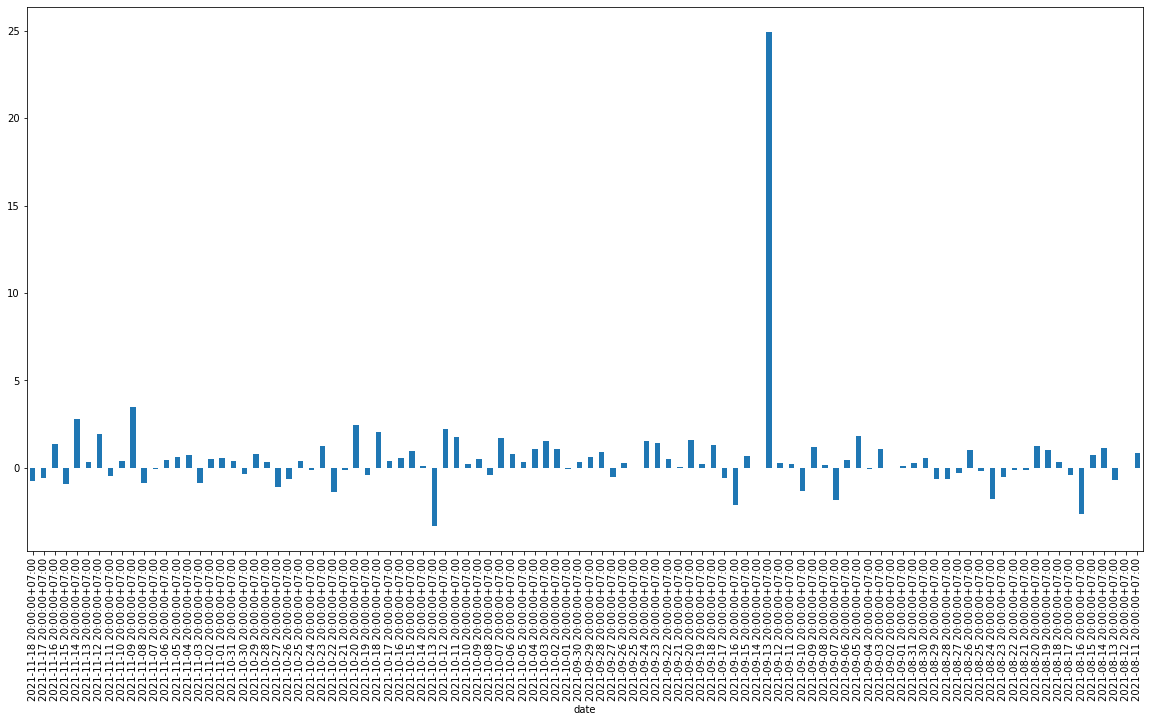

<Figure size 720x720 with 0 Axes>

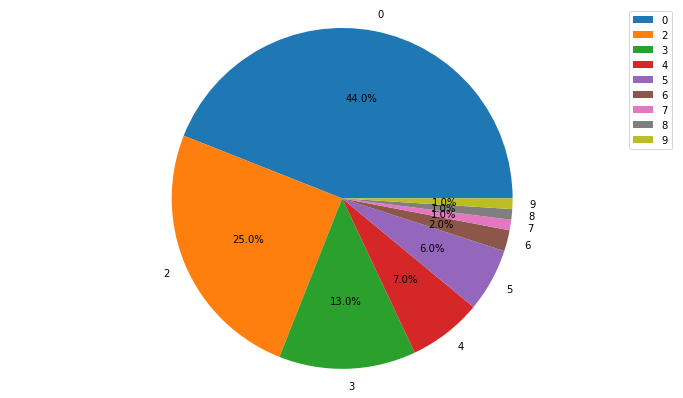

type_continuous_20
0    44
2    25
3    13
4     7
5     6
6     2
7     1
8     1
9     1
dtype: int64


In [23]:
hour_observe = 20
report_by_hour(hour_observe)

Giờ 21
________________________________
count    44.000000
mean      0.877311
std       1.017310
min       0.000000
25%       0.200784
50%       0.605647
75%       1.089206
max       5.596107
Name: hour_return, dtype: float64
38.60168796699817
+++
count    56.000000
mean     -1.536425
std       2.628239
min     -17.909761
25%      -1.673260
50%      -0.899063
75%      -0.543776
max      -0.054083
Name: hour_return, dtype: float64
-86.03979957435709
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


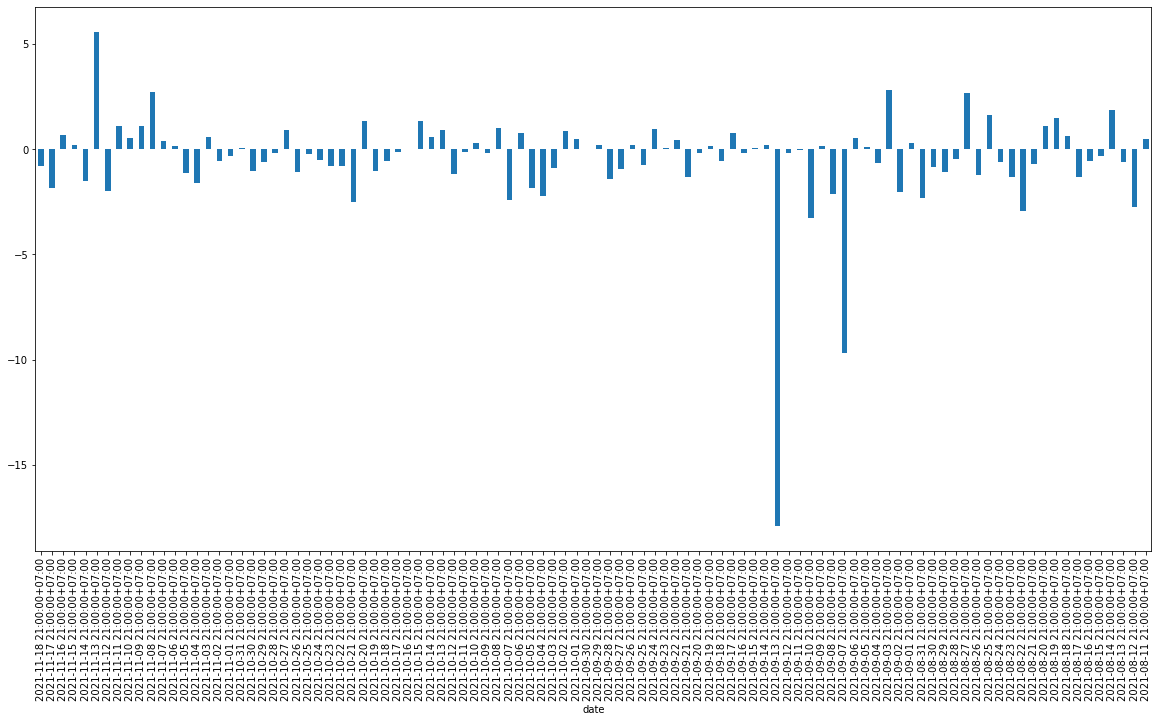

<Figure size 720x720 with 0 Axes>

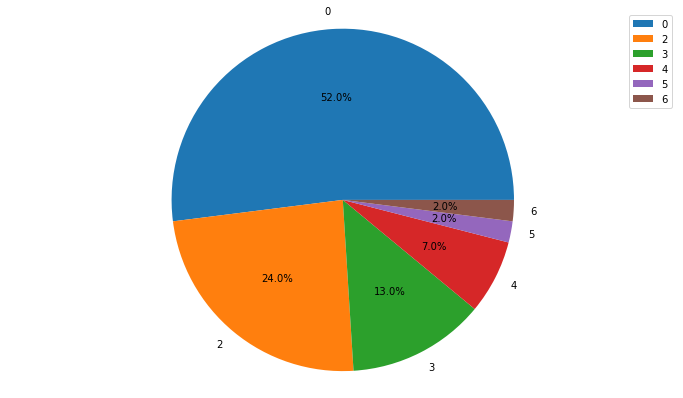

type_continuous_21
0    52
2    24
3    13
4     7
5     2
6     2
dtype: int64


In [24]:
hour_observe = 21
report_by_hour(hour_observe)

Giờ 22
________________________________
count    60.000000
mean      0.819438
std       0.653419
min       0.000000
25%       0.277830
50%       0.669422
75%       1.231939
max       2.872984
Name: hour_return, dtype: float64
49.16625924519615
+++
count    40.000000
mean     -0.836509
std       0.663672
min      -3.343582
25%      -1.130964
50%      -0.695758
75%      -0.386383
max      -0.053191
Name: hour_return, dtype: float64
-33.46037386076967
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


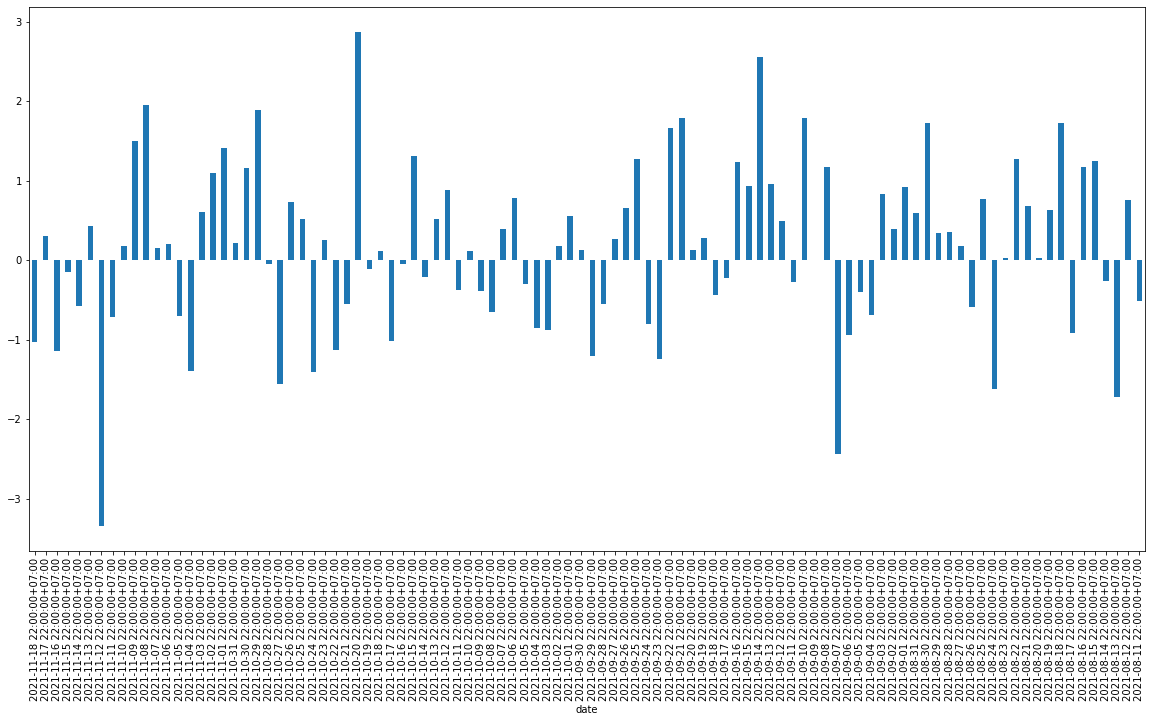

<Figure size 720x720 with 0 Axes>

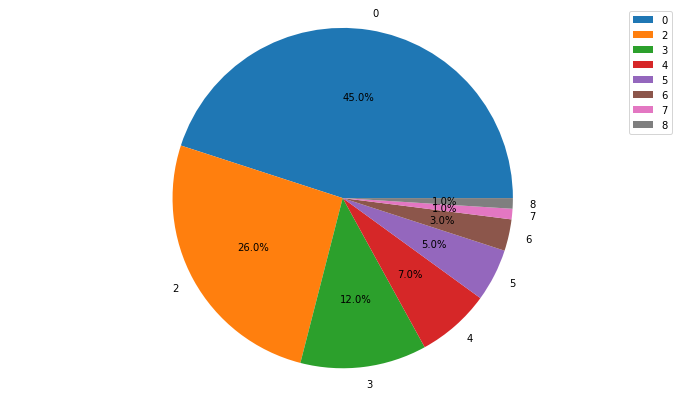

type_continuous_22
0    45
2    26
3    12
4     7
5     5
6     3
7     1
8     1
dtype: int64


In [25]:
hour_observe = 22
report_by_hour(hour_observe)

Giờ 23
________________________________
count    54.000000
mean      0.715316
std       0.704345
min       0.000000
25%       0.283688
50%       0.460440
75%       1.026662
max       3.285078
Name: hour_return, dtype: float64
38.627055230347864
+++
count    46.000000
mean     -0.639633
std       0.555122
min      -2.781707
25%      -0.788419
50%      -0.533567
75%      -0.271958
max      -0.057274
Name: hour_return, dtype: float64
-29.42312920764635
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


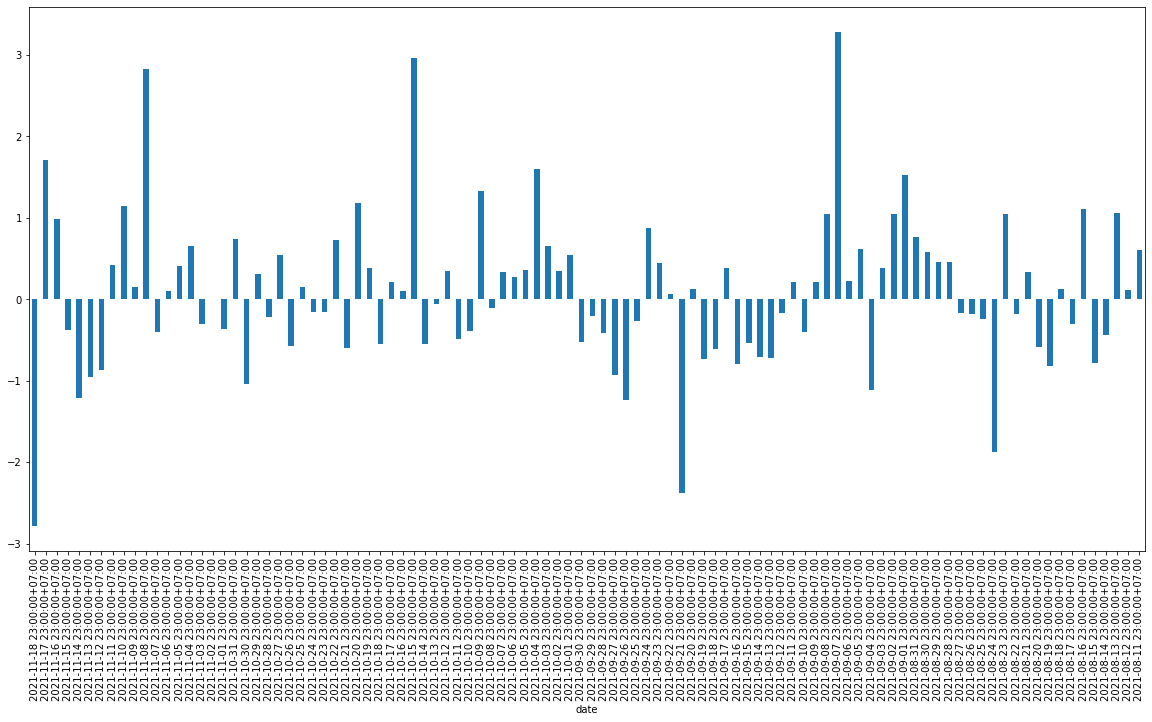

<Figure size 720x720 with 0 Axes>

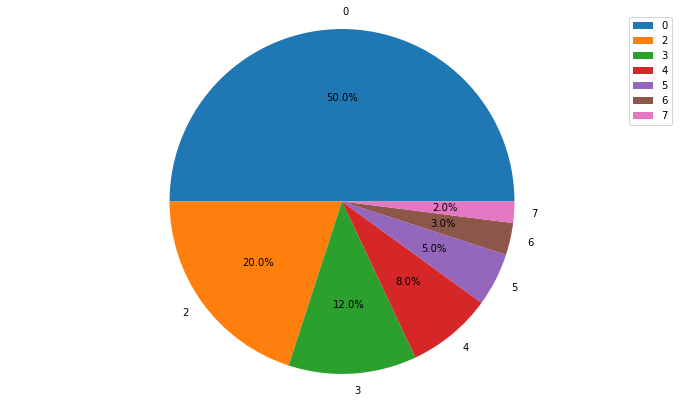

type_continuous_23
0    50
2    20
3    12
4     8
5     5
6     3
7     2
dtype: int64


In [26]:
hour_observe = 23
report_by_hour(hour_observe)

Giờ 0
________________________________
count    46.000000
mean      0.737720
std       1.160805
min       0.000000
25%       0.137852
50%       0.442892
75%       0.674499
max       6.996047
Name: hour_return, dtype: float64
33.93513009191045
+++
count    54.000000
mean     -0.597450
std       0.454063
min      -2.155172
25%      -0.902948
50%      -0.562966
75%      -0.204344
max      -0.050201
Name: hour_return, dtype: float64
-32.26227423701581
____________________________________________________________


<ipython-input-2-18b55adf4e38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


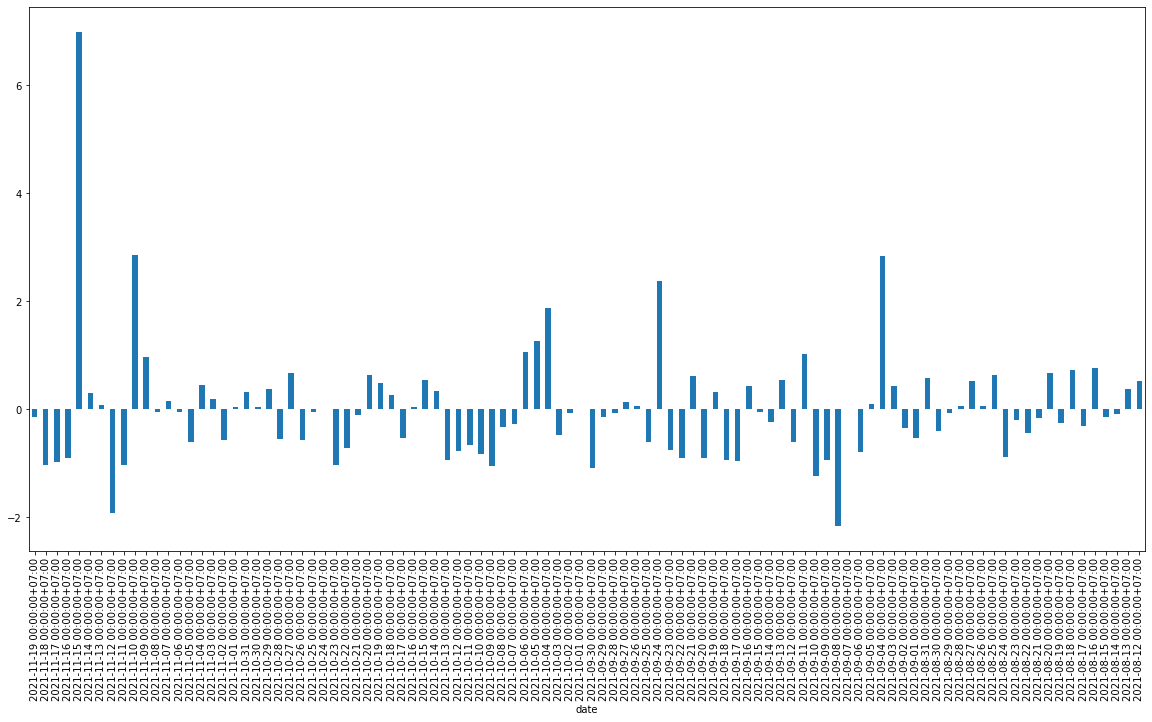

<Figure size 720x720 with 0 Axes>

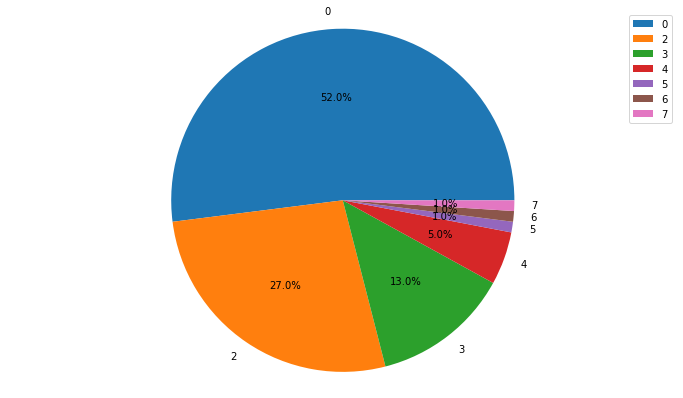

type_continuous_0
0    52
2    27
3    13
4     5
5     1
6     1
7     1
dtype: int64


In [27]:
hour_observe = 0
report_by_hour(hour_observe)